In [103]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Data Mining and Data Analytics/Data Cleaned/modified_df1.csv')

In [2]:
df

,Index,LCLid,StdorToU,KWHhh,TimeOfDay,Year,Month,Day,Appliances,People,Date_Time
0,1440.0,MAC000006,Std,0.104609,00:00:00,2012.0,1.0,1.0,2.0,4.0,2012-01-01 00:00:00
1,1441.0,MAC000006,Std,0.066569,00:30:00,2012.0,1.0,1.0,2.0,4.0,2012-01-01 00:30:00
2,1442.0,MAC000006,Std,0.247258,01:00:00,2012.0,1.0,1.0,5.0,4.0,2012-01-01 01:00:00
3,1443.0,MAC000006,Std,0.080834,01:30:00,2012.0,1.0,1.0,2.0,4.0,2012-01-01 01:30:00
4,1444.0,MAC000006,Std,0.066569,02:00:00,2012.0,1.0,1.0,2.0,4.0,2012-01-01 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...
122683,114043.0,MAC000006,Std,0.194040,21:30:00,2017.0,12.0,31.0,3.0,4.0,2017-12-31 21:30:00
122684,114044.0,MAC000006,Std,0.276360,22:00:00,2017.0,12.0,31.0,4.0,4.0,2017-12-31 22:00:00
122685,114045.0,MAC000006,Std,0.188160,22:30:00,2017.0,12.0,31.0,3.0,4.0,2017-12-31 22:30:00
122686,114046.0,MAC000006,Std,0.258720,23:00:00,2017.0,12.0,31.0,4.0,4.0,2017-12-31 23:00:00


<h2>ARIMA</h2>

Significance Level

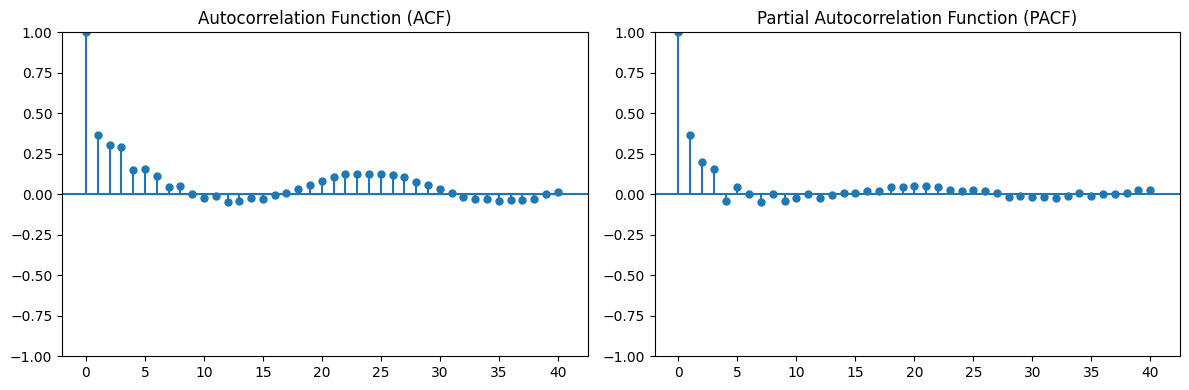

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
# Plotting ACF and PACF with significance levels

# Timeseries data from df
timeseries = df['KWHhh']

# Plot ACF
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(timeseries, lags=40, alpha=0.05, ax=axes[0])  # alpha sets the significance level
axes[0].set_title('Autocorrelation Function (ACF)')

# Plot PACF
plot_pacf(timeseries, lags=40, alpha=0.05, ax=axes[1])  # alpha sets the significance level
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


ARIMA model

In [48]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import numpy as np

# Prepare data for training
train_data = df[(df['Year'] >= 2012) & (df['Year'] <= 2016)]['KWHhh']
test_data = df[df['Year'] == 2017]['KWHhh']

# Fit ARIMA model
model = ARIMA(train_data, order=(2, 0, 6))  # (p, d, q) order
model_fit = model.fit()

# Make predictions for 2017
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Create a DataFrame for actual vs. predicted
comparison_df = pd.DataFrame({'Actual': test_data, 'Predicted': predictions})
comparison_df.index = df[df['Year'] == 2017].index

# Print or plot the comparison
print(comparison_df)


          Actual  Predicted
105168  0.107123   0.234326
105169  0.068169   0.245759
105170  0.253200   0.247868
105171  0.082777   0.252795
105172  0.068169   0.255226
...          ...        ...
122683  0.194040   0.265657
122684  0.276360   0.265657
122685  0.188160   0.265657
122686  0.258720   0.265657
122687  0.252840   0.265657

[17520 rows x 2 columns]


ARIMA RMSE, MAE, R-Square

In [49]:

arima_rmse = np.sqrt(mean_squared_error(test_data, predictions))
print('ARIMA RMSE:', arima_rmse)
arima_mae = mean_absolute_error(test_data, predictions)
print('ARIMA MAE:', arima_mae)
arima_r2 = r2_score(test_data, predictions)
print('ARIMA R-squared:', arima_r2)
arima_mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print('ARIMA MAPE:', arima_mape)


ARIMA RMSE: 0.28739240821742473
ARIMA MAE: 0.16760369235441375
ARIMA R-squared: -0.0682697067928304
ARIMA MAPE: 62.25300456362979


ARIMA Plotting Actual vs Predicted

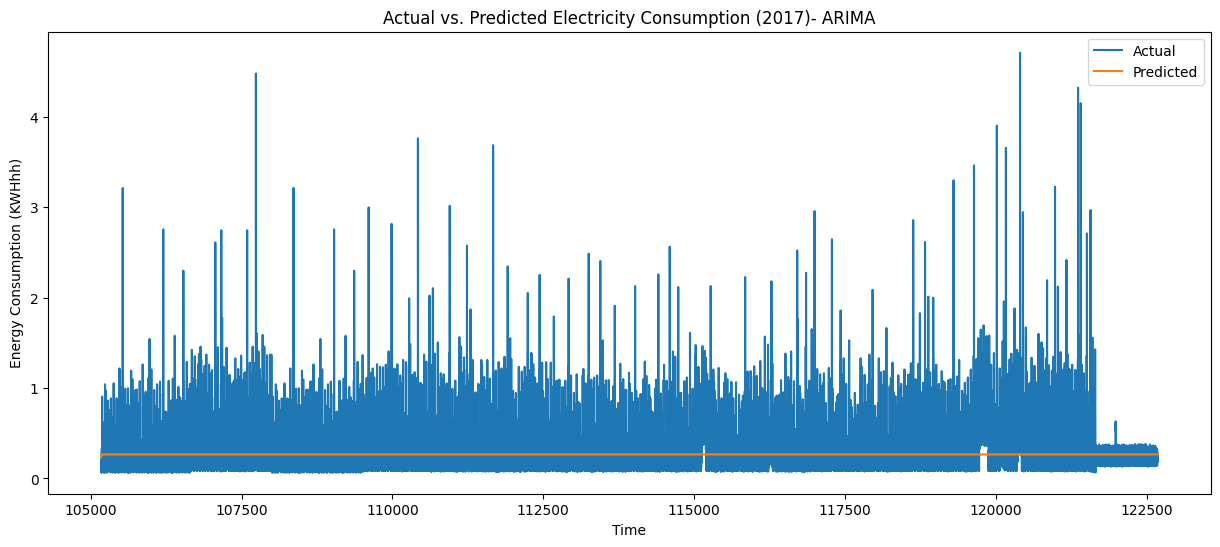

In [50]:

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(comparison_df['Actual'], label='Actual')
plt.plot(comparison_df['Predicted'], label='Predicted')
plt.legend()
plt.title('Actual vs. Predicted Electricity Consumption (2017)- ARIMA')
plt.xlabel('Time')
plt.ylabel('Energy Consumption (KWHhh)')
plt.show()

ARIMA creating new Dataframe

In [51]:
# Create a copy to avoid modifying the original DataFrame
new_df_arima = comparison_df.copy()

# Get the 'Date_Time' column from the original DataFrame for the year 2017
date_time_2017 = df[df['Year'] == 2017]['Date_Time'].values

# Reset index of new_df_arima to ensure alignment when adding 'Date_Time'
new_df_arima = new_df_arima.reset_index(drop=True)

# Assign the 'Date_Time' column to the new DataFrame
new_df_arima['Date_Time'] = date_time_2017

# Print or further process the new DataFrame
new_df_arima

,Actual,Predicted,Date_Time
0,0.107123,0.234326,2017-01-01 00:00:00
1,0.068169,0.245759,2017-01-01 00:30:00
2,0.253200,0.247868,2017-01-01 01:00:00
3,0.082777,0.252795,2017-01-01 01:30:00
4,0.068169,0.255226,2017-01-01 02:00:00
...,...,...,...
17515,0.194040,0.265657,2017-12-31 21:30:00
17516,0.276360,0.265657,2017-12-31 22:00:00
17517,0.188160,0.265657,2017-12-31 22:30:00
17518,0.258720,0.265657,2017-12-31 23:00:00


ARIMA Plotting Actual vs Predicted - Daily Agrregation

In [52]:
# Calculate the absolute difference between actual and predicted values
new_df_arima['Difference'] = abs(new_df_arima['Actual'] - new_df_arima['Predicted'])

# Convert 'Date_Time' to datetime objects if it's not already
new_df_arima['Date_Time'] = pd.to_datetime(new_df_arima['Date_Time'])

# Group by month and calculate the average monthly difference
monthly_deficiency_arima = new_df_arima.groupby(new_df_arima['Date_Time'].dt.month)['Difference'].sum()

# Calculate the average monthly deficiency (overall average)
average_monthly_deficiency_arima = monthly_deficiency_arima.mean()

print(f"Average Monthly Deficiency: {average_monthly_deficiency_arima}") #Fixed: Changed average_monthly_deficiency to average_monthly_deficiency_arima

Average Monthly Deficiency: 244.70139083744414


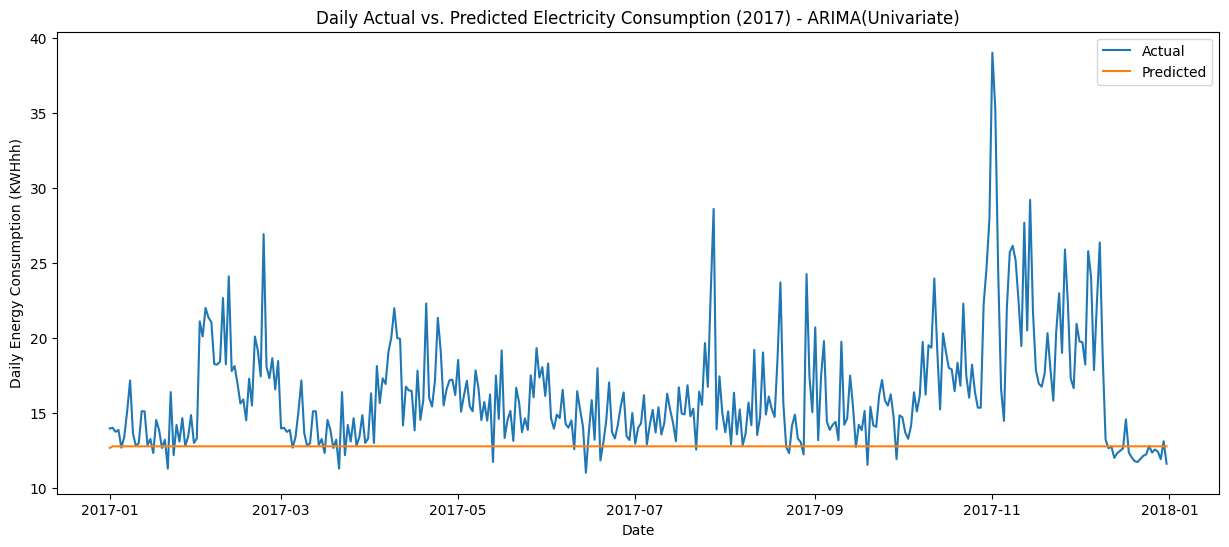

In [53]:

import pandas as pd
import matplotlib.pyplot as plt


# Convert 'Date_Time' to datetime objects
new_df_arima['Date_Time'] = pd.to_datetime(new_df_arima['Date_Time'])

# Set 'Date_Time' as the index
new_df_arima = new_df_arima.set_index('Date_Time')

# Resample to daily frequency and sum the values
daily_data = new_df_arima.resample('D').sum()

# Plotting daily aggregated values
plt.figure(figsize=(15, 6))
plt.plot(daily_data['Actual'], label='Actual')
plt.plot(daily_data['Predicted'], label='Predicted')
plt.legend()
plt.title('Daily Actual vs. Predicted Electricity Consumption (2017) - ARIMA(Univariate)')
plt.xlabel('Date')
plt.ylabel('Daily Energy Consumption (KWHhh)')
plt.show()


In [59]:
import numpy as np
# Calculate MAE and RMSE for daily data
daily_mae = mean_absolute_error(daily_data['Actual'], daily_data['Predicted'])
daily_rmse = np.sqrt(mean_squared_error(daily_data['Actual'], daily_data['Predicted']))
daily_mape = np.mean(np.abs((daily_data['Actual'] - daily_data['Predicted']) / daily_data['Actual'])) * 100
print(f'Daily MAE: {daily_mae}')
print(f'Daily RMSE: {daily_rmse}')
print(f'Daily MAPE: {daily_mape}')


Daily MAE: 3.613050776398214
Daily RMSE: 5.119433288949619
Daily MAPE: 19.16775263477804


ARIMA Plotting Actual vs Predicted - Monthly Agrregation

<ipython-input-54-05e452ba352e>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = new_df_arima.resample('M').sum()


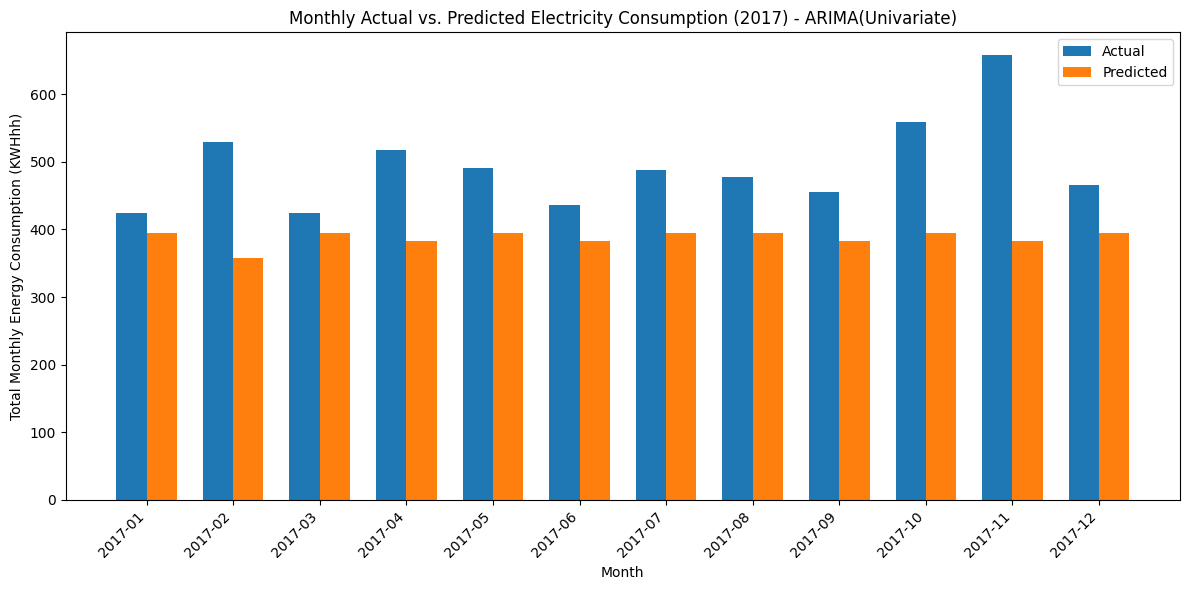

In [54]:
import matplotlib.pyplot as plt

# Resample to monthly frequency and sum the values
monthly_data = new_df_arima.resample('M').sum()

# Create the bar plot
plt.figure(figsize=(12, 6))
width = 0.35  # Adjust the width of the bars

x = range(len(monthly_data))
plt.bar([i - width/2 for i in x], monthly_data['Actual'], width, label='Actual')
plt.bar([i + width/2 for i in x], monthly_data['Predicted'], width, label='Predicted')

plt.xlabel('Month')
plt.ylabel('Total Monthly Energy Consumption (KWHhh)')
plt.title('Monthly Actual vs. Predicted Electricity Consumption (2017) - ARIMA(Univariate)')
plt.xticks(x, monthly_data.index.strftime('%Y-%m'), rotation=45, ha='right') # Format x-axis labels
plt.legend()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [55]:
monthly_data


,Actual,Predicted,Difference
Date_Time,,,
2017-01-31,424.810928,395.191184,211.407645
2017-02-28,529.458720,357.042402,276.130133
2017-03-31,424.810928,395.296946,211.495386
2017-04-30,517.728120,382.545431,266.655246
2017-05-31,490.427280,395.296946,242.925677
2017-06-30,436.254840,382.545431,205.723375
2017-07-31,487.428480,395.296946,234.693677
2017-08-31,477.444240,395.296946,226.213523
2017-09-30,455.564760,382.545431,219.259687


In [60]:
# Calculate the absolute difference between actual and predicted values
monthly_data['Difference'] = abs(monthly_data['Actual'] - monthly_data['Predicted'])

# Calculate the mean of the absolute differences
mean_absolute_difference_arima = monthly_data['Difference'].mean()

print(f"Mean Absolute Difference: {mean_absolute_difference_arima}")

# Calculate the absolute difference between actual and predicted values
monthly_data['Difference Percentage'] = ((abs(monthly_data['Actual'] - monthly_data['Predicted'])/monthly_data['Actual'])*100)

# Calculate the mean of the absolute differences
mean_absolute_difference_percentage_arima = monthly_data['Difference Percentage'].mean()

print(f"Mean Absolute Difference Percentage: {mean_absolute_difference_percentage_arima}")

Mean Absolute Difference: 106.0969522669322
Mean Absolute Difference Percentage: 20.232654965244283


<h2>SARIMAX</h2>

SARIMAX Model

In [61]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

df['Date_Time'] = pd.to_datetime(df['Date_Time'])

# Aggregate daily data
daily_df_sarimax = df.groupby(df['Date_Time'].dt.date).agg({'People': 'mean', 'Appliances': 'mean', 'KWHhh': 'sum'})

# Prepare data for training and testing
train_data_sarimax = daily_df_sarimax[(daily_df_sarimax.index >= pd.to_datetime('2012-01-01').date()) & (daily_df_sarimax.index <= pd.to_datetime('2016-12-31').date())]
test_data_sarimax = daily_df_sarimax[(daily_df_sarimax.index >= pd.to_datetime('2017-01-01').date()) & (daily_df_sarimax.index <= pd.to_datetime('2017-12-31').date())]

# Define exogenous variables
exog_train_sarimax = train_data[['People', 'Appliances']]
exog_test_sarimax = test_data[['People', 'Appliances']]

# Fit SARIMAX model (adjust order as needed)
model = SARIMAX(train_data_sarimax['KWHhh'], exog=exog_train_sarimax, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7)) # Example order, tune as necessary
model_fit = model.fit()

# Make predictions
predictions_sarimax = model_fit.predict(start=len(train_data_sarimax), end=len(daily_df_sarimax)-1, exog=exog_test_sarimax)



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


SARIMAX Evaluations

In [147]:
sarimax_rmse = np.sqrt(mean_squared_error(test_data_sarimax['KWHhh'], predictions_sarimax))
sarimax_mae = mean_absolute_error(test_data_sarimax['KWHhh'], predictions_sarimax)
sarimax_r2 = r2_score(test_data_sarimax['KWHhh'], predictions_sarimax)
print(f"SARIMAX RMSE: {sarimax_rmse/24}")
print(f"SARIMAX MAE: {sarimax_mae/24}")
print(f"SARIMAX R-squared: {sarimax_r2}")




SARIMAX RMSE: 0.19800683166321822
SARIMAX MAE: 0.17737813431065416
SARIMAX R-squared: -0.608145214449707


SARIMAX Plot

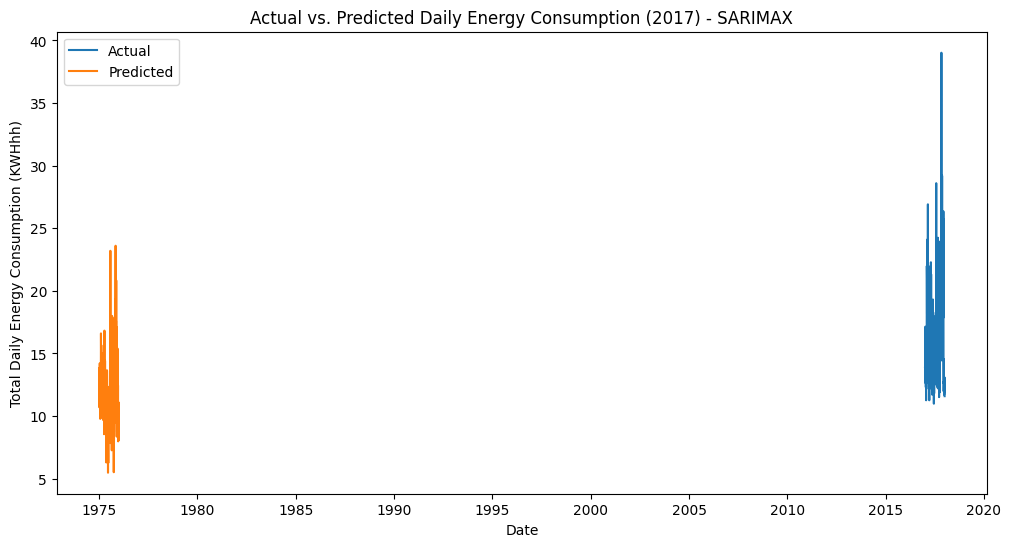

In [63]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(test_data_sarimax['KWHhh'], label='Actual')
plt.plot(predictions_sarimax, label='Predicted')
plt.legend()
plt.title('Actual vs. Predicted Daily Energy Consumption (2017) - SARIMAX')
plt.xlabel('Date')
plt.ylabel('Total Daily Energy Consumption (KWHhh)')
plt.show()

SARIMAX new Dataframe

In [64]:
import pandas as pd
# Create a date range for 2017 with daily frequency
date_rng = pd.date_range(start='1/1/2017', end='12/31/2017', freq='D') # Changed freq to 'D'

# Create the new DataFrame
new_df_sarimax = pd.DataFrame({'Date': date_rng, 'Actual': test_data_sarimax['KWHhh'].values, 'Predicted': predictions_sarimax.values}) # Access 'KWHhh' column from test_data

new_df_sarimax

,Date,Actual,Predicted
0,2017-01-01,13.940600,13.828329
1,2017-01-02,13.989292,11.019914
2,2017-01-03,13.716615,12.573632
3,2017-01-04,13.848084,13.094792
4,2017-01-05,12.659993,10.696639
...,...,...,...
360,2017-12-27,12.542040,9.732536
361,2017-12-28,12.400920,9.492698
362,2017-12-29,11.895240,8.613622
363,2017-12-30,13.088880,11.089020


In [65]:
import numpy as np
# Calculate MAPE
sarimax_mape = np.mean(np.abs((new_df_sarimax['Actual'] - new_df_sarimax['Predicted'])/new_df_sarimax['Actual']) * 100)
print(f"SARIMAX MAPE: {sarimax_mape}")


SARIMAX MAPE: 25.518206170114667


In [ ]:
# Calculate the absolute difference between actual and predicted values
new_df_sarimax['Difference'] = abs(new_df_sarimax['Actual'] - new_df_sarimax['Predicted'])

# Convert 'Date' to datetime objects if it's not already
new_df_sarimax['Date'] = pd.to_datetime(new_df_sarimax['Date'])

# Group by month and calculate the average monthly difference
monthly_deficiency_sarimax = new_df_sarimax.groupby(new_df_sarimax['Date'].dt.month)['Difference'].sum()

# Calculate the average monthly deficiency (overall average)
average_monthly_deficiency_sarimax = monthly_deficiency_sarimax.mean()

print(f"Average Monthly Deficiency: {average_monthly_deficiency_sarimax}") #Fixed: Changed average_monthly_deficiency to average_monthly_deficiency_arima

Average Monthly Deficiency: 129.48603804677754


SARIMAX Daily Actual vs. Predicted Energy Consumption

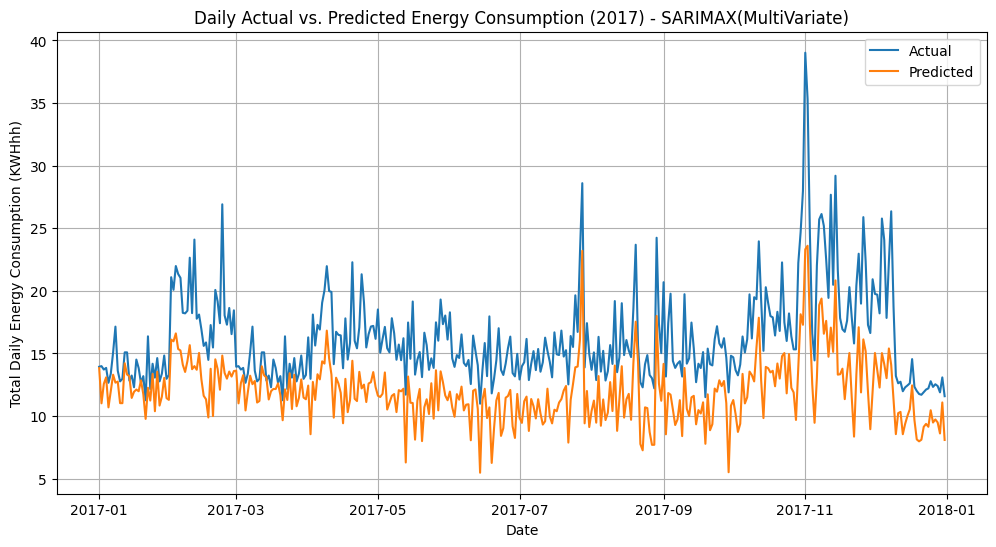

In [66]:
import matplotlib.pyplot as plt
# Assuming new_df is already created and contains 'Date', 'Actual', and 'Predicted' columns

plt.figure(figsize=(12, 6))
plt.plot(new_df_sarimax['Date'], new_df_sarimax['Actual'], label='Actual')
plt.plot(new_df_sarimax['Date'], new_df_sarimax['Predicted'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Total Daily Energy Consumption (KWHhh)')
plt.title('Daily Actual vs. Predicted Energy Consumption (2017) - SARIMAX(MultiVariate)')
plt.legend()
plt.grid(True)
plt.show()


SARIMAX Monthly Actual vs. Predicted Energy Consumption

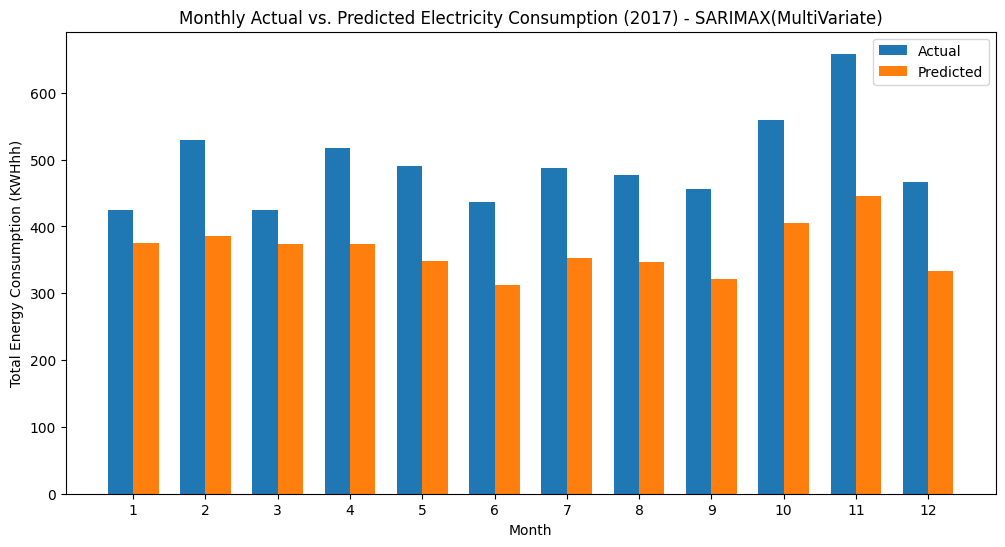

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime objects if it's not already
new_df_sarimax['Date'] = pd.to_datetime(new_df_sarimax['Date'])

# Extract month from 'Date'
new_df_sarimax['Month'] = new_df_sarimax['Date'].dt.month

# Group by month and calculate the sum of actual and predicted values
monthly_data_sarimax = new_df_sarimax.groupby('Month').agg({'Actual': 'sum', 'Predicted': 'sum'})

# Create the bar graph
plt.figure(figsize=(12, 6))
width = 0.35
x = monthly_data_sarimax.index
plt.bar(x - width/2, monthly_data_sarimax['Actual'], width, label='Actual')
plt.bar(x + width/2, monthly_data_sarimax['Predicted'], width, label='Predicted')

plt.xlabel('Month')
plt.ylabel('Total Energy Consumption (KWHhh)')
plt.title('Monthly Actual vs. Predicted Electricity Consumption (2017) - SARIMAX(MultiVariate)')
plt.xticks(x)
plt.legend()
plt.show()


In [70]:
# Calculate the absolute difference between actual and predicted values
monthly_data_sarimax['Difference'] = abs(monthly_data_sarimax['Actual'] - monthly_data_sarimax['Predicted'])

# Calculate the mean of the absolute differences
mean_absolute_difference_sarimax = monthly_data_sarimax['Difference'].mean()

print(f"Mean Absolute Difference: {mean_absolute_difference_sarimax}")

monthly_data_sarimax['Difference Percentage'] = (abs(monthly_data_sarimax['Actual'] - monthly_data_sarimax['Predicted'])/monthly_data_sarimax['Actual'])*100

# Calculate the mean of the absolute differences
mean_absolute_difference_percentage_sarimax = monthly_data_sarimax['Difference Percentage'].mean()

print(f"Mean Absolute Difference Percentage: {mean_absolute_difference_percentage_sarimax}")


Mean Absolute Difference: 129.3529825812703
Mean Absolute Difference Percentage: 25.71358022229076


<h2>RNN</h2>

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Data Preparation
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df = df.set_index('Date_Time')

# Select relevant columns and scale features
data = df[['People', 'Appliances', 'KWHhh']]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Split data into training and testing sets
train_data = scaled_data[:len(df[(df.index.year >= 2012) & (df.index.year <= 2016)])]
test_data = scaled_data[len(df[(df.index.year >= 2012) & (df.index.year <= 2016)]):]

# Create sequences for LSTM
def create_sequences(data, seq_length):
  xs = []
  ys = []
  for i in range(len(data)-seq_length-1):
    x = data[i:(i+seq_length)]
    y = data[i+seq_length, -1] # Predict KWHhh
    xs.append(x)
    ys.append(y)
  return np.array(xs), np.array(ys)

seq_length = 10  # Adjust sequence length as needed
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)


# 2. Build the RNN Model (SimpleRNN)
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# 3. Train the Model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# 4. Make Predictions
y_pred = model.predict(X_test)

# 5. Inverse Transform to Original Scale
y_pred = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), 2)), y_pred), axis=1))[:, -1]
y_test_original = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), 2)), np.expand_dims(y_test, axis=1)), axis=1))[:,-1]


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3287/3287 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 0.0025 - val_loss: 0.0027
Epoch 2/50
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 0.0017 - val_loss: 0.0031
Epoch 3/50
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 0.0017 - val_loss: 0.0027
Epoch 4/50
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 0.0017 - val_loss: 0.0027
Epoch 5/50
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 0.0017 - val_loss: 0.0026
Epoch 6/50
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 0.0017 - val_loss: 0.0026
Epoch 7/50
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 0.0016 - val_loss: 0.0025
Epoch 8/50
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 0.0015 - val_loss: 0.0026
Epoch 9/50
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 0.0015 - val_loss: 0.0025
Epoch 10/50
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - loss: 0.0015 - val_loss: 0.0025
Epoch 11/50
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 0.0016 - val_loss: 0.0025
Epoch 12/50
3287/3287 ━━━━━━━━

RNN new DataFrame

In [74]:
import pandas as pd
from tensorflow.keras.layers import SimpleRNN

# Reset index to bring back the Date_Time column
df = df.reset_index()

# Extract the 'Date_Time' values for 2017, considering the sequence length
date_time_2017 = df[df['Year'] == 2017]['Date_Time'].iloc[seq_length+1:]

# Create the new DataFrame
new_df_rnn = pd.DataFrame({'Date_Time': date_time_2017, 'y_pred': y_pred, 'y_test_original': y_test_original})

# Display the DataFrame
new_df_rnn

,Date_Time,y_pred,y_test_original
105179,2017-01-01 05:30:00,0.182810,0.068169
105180,2017-01-01 06:00:00,0.314638,0.262938
105181,2017-01-01 06:30:00,0.153035,0.068169
105182,2017-01-01 07:00:00,0.176637,0.073038
105183,2017-01-01 07:30:00,0.309695,0.331108
...,...,...,...
122683,2017-12-31 21:30:00,0.271624,0.182280
122684,2017-12-31 22:00:00,0.222770,0.194040
122685,2017-12-31 22:30:00,0.304059,0.276360
122686,2017-12-31 23:00:00,0.226568,0.188160


RNN Evaluation

In [75]:
import pandas as pd
# Calculate the absolute difference between actual and predicted values
new_df_rnn['Difference'] = abs(new_df_rnn['y_test_original'] - new_df_rnn['y_pred'])

# Convert 'Date_Time' to datetime objects if it's not already
new_df_rnn['Date_Time'] = pd.to_datetime(new_df_rnn['Date_Time'])

# Group by month and calculate the average monthly difference
monthly_deficiency_rnn = new_df_rnn.groupby(new_df_rnn['Date_Time'].dt.month)['Difference'].sum()

# Calculate the average monthly deficiency (overall average)
average_monthly_deficiency_rnn = monthly_deficiency_rnn.mean()

print(f"Average Monthly Deficiency (RNN): {average_monthly_deficiency_rnn}")


Average Monthly Deficiency (RNN): 180.77315043360184


,Difference
105179,0.071082
105180,0.024559
105181,0.069194
105182,0.064917
105183,0.092622
...,...
122683,0.092994
122684,0.053540
122685,0.045260
122686,0.061957


In [77]:
np.abs((new_df_rnn['y_test_original'] - new_df_rnn['y_pred']) / new_df_rnn['y_test_original'])

,0
105179,1.681706
105180,0.196624
105181,1.244928
105182,1.418413
105183,0.064668
...,...
122683,0.490146
122684,0.148061
122685,0.100228
122686,0.204124


In [76]:
import numpy as np
rnn_rmse = np.sqrt(mean_squared_error(new_df_rnn['y_test_original'], new_df_rnn['y_pred']))
rnn_mae = mean_absolute_error(new_df_rnn['y_test_original'], new_df_rnn['y_pred'])
rnn_r2= r2_score(new_df_rnn['y_test_original'], new_df_rnn['y_pred'])
rnn_mape = np.mean(np.abs((new_df_rnn['y_test_original'] - new_df_rnn['y_pred']) / new_df_rnn['y_test_original'])) * 100
print(f"RNN MAE: {rnn_mae}")
print(f"RNN RMSE: {rnn_rmse}")
print(f"RNN R-squared: {rnn_r2}")
print(f"RNN MAPE: {rnn_mape}")

RNN MAE: 0.12389501428997786
RNN RMSE: 0.21620197778129246
RNN R-squared: 0.39557930761572335
RNN MAPE: 46.00070196887159


RNN Daily Plot

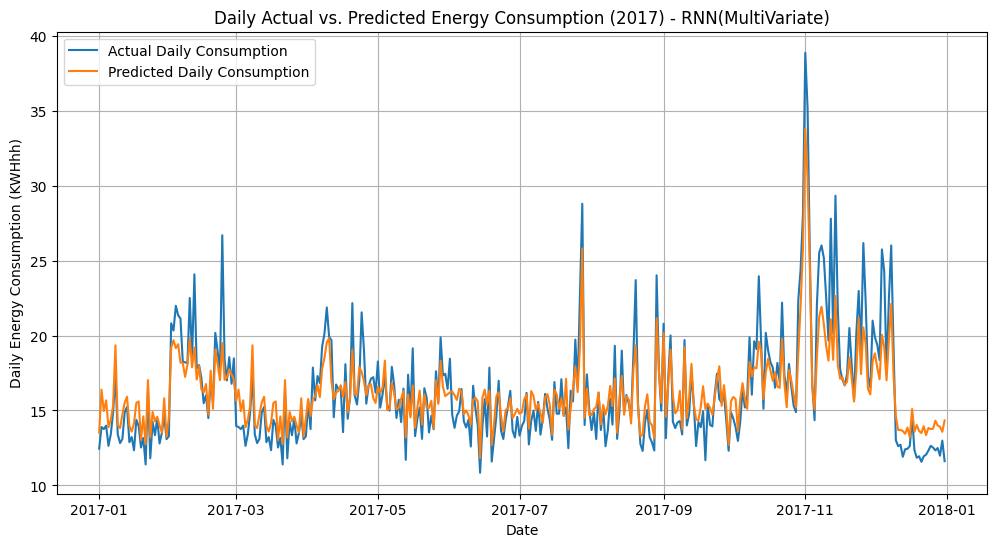

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date_Time' to datetime objects if it's not already
new_df_rnn['Date_Time'] = pd.to_datetime(new_df_rnn['Date_Time'])

# Aggregate to daily values
daily_rnn = new_df_rnn.groupby(new_df_rnn['Date_Time'].dt.date).agg({'y_pred': 'sum', 'y_test_original': 'sum'})

# Plot the aggregated data
plt.figure(figsize=(12, 6))
plt.plot(daily_rnn.index, daily_rnn['y_test_original'], label='Actual Daily Consumption')
plt.plot(daily_rnn.index, daily_rnn['y_pred'], label='Predicted Daily Consumption')
plt.xlabel('Date')
plt.ylabel('Daily Energy Consumption (KWHhh)')
plt.title('Daily Actual vs. Predicted Energy Consumption (2017) - RNN(MultiVariate)')
plt.legend()
plt.grid(True)
plt.show()


RNN Monthly Plot

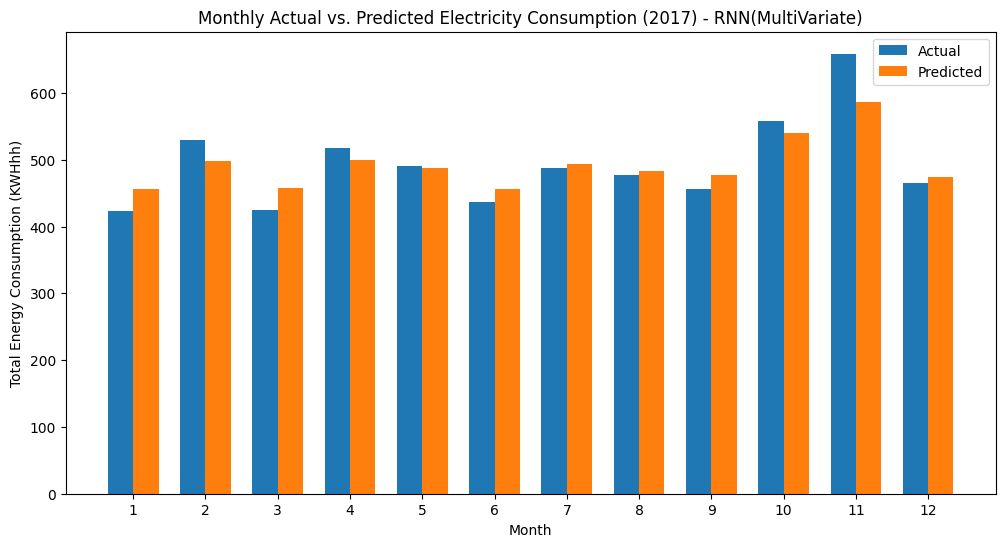

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date_Time' to datetime objects if it's not already
new_df_rnn['Date_Time'] = pd.to_datetime(new_df_rnn['Date_Time'])

# Extract month from 'Date_Time'
new_df_rnn['Month'] = new_df_rnn['Date_Time'].dt.month

# Group by month and calculate the sum of actual and predicted values
monthly_data_rnn = new_df_rnn.groupby('Month').agg({'y_test_original': 'sum', 'y_pred': 'sum'})

# Create the bar graph
plt.figure(figsize=(12, 6))
width = 0.35
x = monthly_data_rnn.index
plt.bar(x - width/2, monthly_data_rnn['y_test_original'], width, label='Actual')
plt.bar(x + width/2, monthly_data_rnn['y_pred'], width, label='Predicted')

plt.xlabel('Month')
plt.ylabel('Total Energy Consumption (KWHhh)')
plt.title('Monthly Actual vs. Predicted Electricity Consumption (2017) - RNN(MultiVariate)')
plt.xticks(x)
plt.legend()
plt.show()


In [80]:
# Calculate the absolute difference between actual and predicted values
monthly_data_rnn['Difference'] = abs(monthly_data_rnn['y_test_original'] - monthly_data_rnn['y_pred'])

# Calculate the mean of the absolute differences
mean_absolute_difference_rnn = monthly_data_rnn['Difference'].mean()

print(f"Mean Absolute Difference: {mean_absolute_difference_rnn}")

monthly_data_rnn['Difference Percentage'] = (abs(monthly_data_rnn['y_test_original'] - monthly_data_rnn['y_pred'])/monthly_data_rnn['y_test_original'])*100

# Calculate the mean of the absolute differences
mean_absolute_difference_percentage_rnn = monthly_data_rnn['Difference Percentage'].mean()

print(f"Mean Absolute Difference Percentage: {mean_absolute_difference_percentage_rnn}")

Mean Absolute Difference: 22.285733185221506
Mean Absolute Difference Percentage: 4.391845691230419


<h2>LSTM</h2>

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming df is already loaded and preprocessed with 'Date_Time', 'People', 'Appliances', and 'KWHhh' columns

# 1. Data Preparation
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df = df.set_index('Date_Time')

# Select relevant columns and scale features
data = df[['People', 'Appliances', 'KWHhh']]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Split data into training and testing sets
train_data = scaled_data[:len(df[(df.index.year >= 2012) & (df.index.year <= 2016)])]
test_data = scaled_data[len(df[(df.index.year >= 2012) & (df.index.year <= 2016)]):]

# Create sequences for LSTM
def create_sequences(data, seq_length):
  xs = []
  ys = []
  for i in range(len(data)-seq_length-1):
    x = data[i:(i+seq_length)]
    y = data[i+seq_length, -1] # Predict KWHhh
    xs.append(x)
    ys.append(y)
  return np.array(xs), np.array(ys)

seq_length = 10  # Adjust sequence length as needed
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)


# 2. Build the LSTM Model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# 3. Train the Model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# 4. Make Predictions
y_pred = model.predict(X_test)

# 5. Inverse Transform to Original Scale
y_pred = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), 2)), y_pred), axis=1))[:, -1] #added zeros to match scaler
y_test_original = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), 2)), np.expand_dims(y_test, axis=1)), axis=1))[:,-1]



Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3287/3287 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - loss: 0.0021 - val_loss: 0.0029
Epoch 2/50
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - loss: 0.0017 - val_loss: 0.0028
Epoch 3/50
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 0.0016 - val_loss: 0.0026
Epoch 4/50
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 0.0017 - val_loss: 0.0026
Epoch 5/50
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - loss: 0.0016 - val_loss: 0.0026
Epoch 6/50
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - loss: 0.0016 - val_loss: 0.0025
Epoch 7/50
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - loss: 0.0016 - val_loss: 0.0025
Epoch 8/50
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 39s 7ms/step - loss: 0.0015 - val_loss: 0.0025
Epoch 9/50
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - loss: 0.0016 - val_loss: 0.0025
Epoch 10/50
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 0.0015 - val_loss: 0.0024
Epoch 11/50
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 0.0015 - val_loss: 0.0024
Epoch 12/50
3287/3287 ━━━━━━━━

LSTM Evaluations

In [89]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
# 6. Evaluate the model
lstm_rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
lstm_mae = mean_absolute_error(y_test_original, y_pred)
lstm_r2 = r2_score(y_test_original, y_pred)
lstm_mape = np.mean(np.abs((y_test_original - y_pred) / y_test_original)) * 100
print(f"LSTM RMSE: {lstm_rmse}")
print(f"LSTM MAE: {lstm_mae}")
print(f"LSTM MAPE: {lstm_mape}")
print(f"LSTM R-squared: {lstm_r2}")


LSTM RMSE: 0.20509802756466228
LSTM MAE: 0.11897418269050708
LSTM MAPE: 43.843888157878226
LSTM R-squared: 0.4560700576852019


LSTM Plot

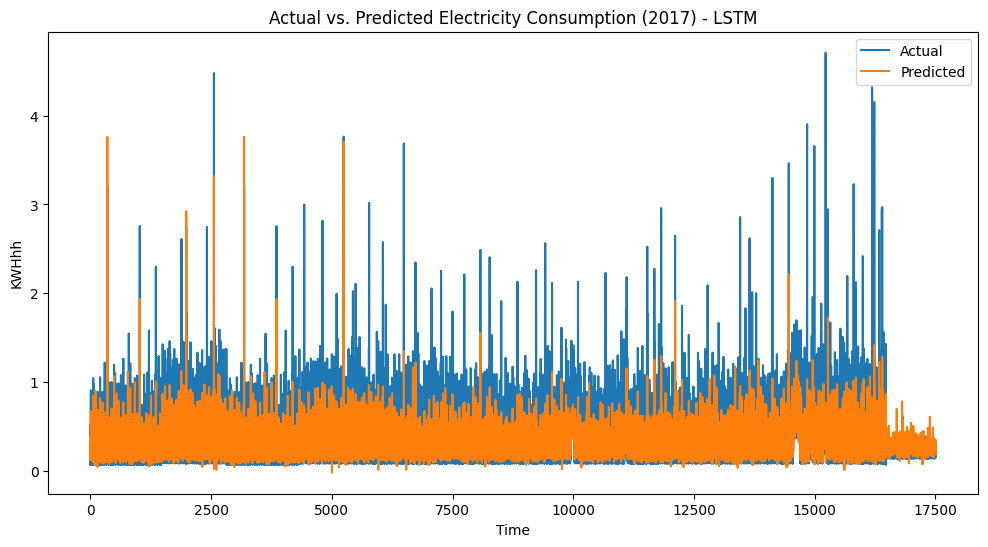

In [90]:
# 7. Plot Results
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs. Predicted Electricity Consumption (2017) - LSTM')
plt.xlabel('Time')
plt.ylabel('KWHhh')
plt.show()

LSTM new DataFrame

In [91]:
import pandas as pd
# Reset index to bring back the Date_Time column
df = df.reset_index()

# Extract the 'Date_Time' values for 2017
date_time_2017 = df[df['Year'] == 2017]['Date_Time'].iloc[seq_length+1:]

# Create the new DataFrame
new_df_lstm = pd.DataFrame({'Date_Time': date_time_2017, 'y_pred': y_pred, 'y_test_original': y_test_original})

# Display the DataFrame
new_df_lstm

,Date_Time,y_pred,y_test_original
105179,2017-01-01 05:30:00,0.124604,0.068169
105180,2017-01-01 06:00:00,0.318238,0.262938
105181,2017-01-01 06:30:00,0.128154,0.068169
105182,2017-01-01 07:00:00,0.120293,0.073038
105183,2017-01-01 07:30:00,0.327285,0.331108
...,...,...,...
122683,2017-12-31 21:30:00,0.253200,0.182280
122684,2017-12-31 22:00:00,0.272623,0.194040
122685,2017-12-31 22:30:00,0.195299,0.276360
122686,2017-12-31 23:00:00,0.182616,0.188160


LSTM daily plot

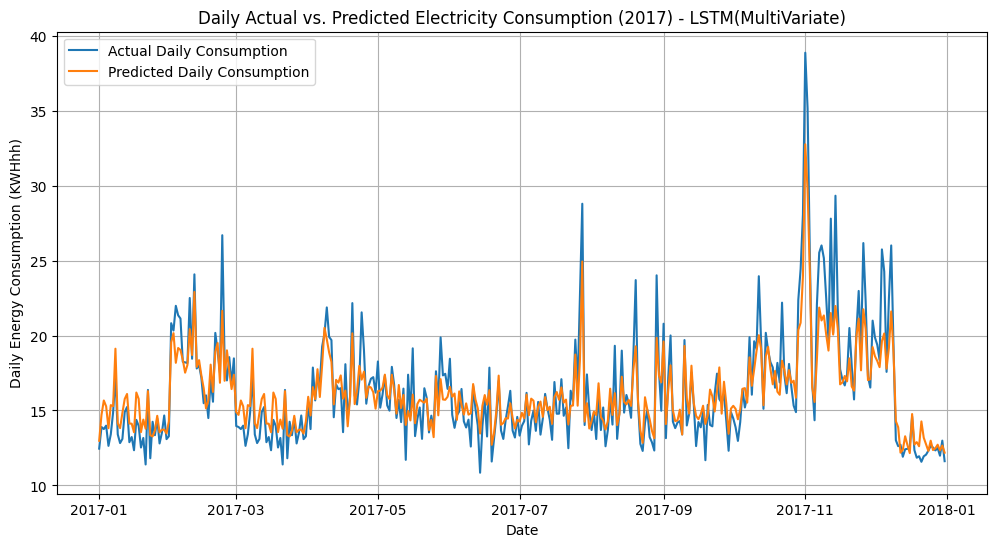

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date_Time' to datetime objects if it's not already
new_df_lstm['Date_Time'] = pd.to_datetime(new_df_lstm['Date_Time'])

# Aggregate to daily values
daily_lstm = new_df_lstm.groupby(new_df_lstm['Date_Time'].dt.date).agg({'y_pred': 'sum', 'y_test_original': 'sum'})

# Plot the aggregated data
plt.figure(figsize=(12, 6))
plt.plot(daily_lstm.index, daily_lstm['y_test_original'], label='Actual Daily Consumption')
plt.plot(daily_lstm.index, daily_lstm['y_pred'], label='Predicted Daily Consumption')
plt.xlabel('Date')
plt.ylabel('Daily Energy Consumption (KWHhh)')
plt.title('Daily Actual vs. Predicted Electricity Consumption (2017) - LSTM(MultiVariate)')
plt.legend()
plt.grid(True)
plt.show()


LSTM monthly plot

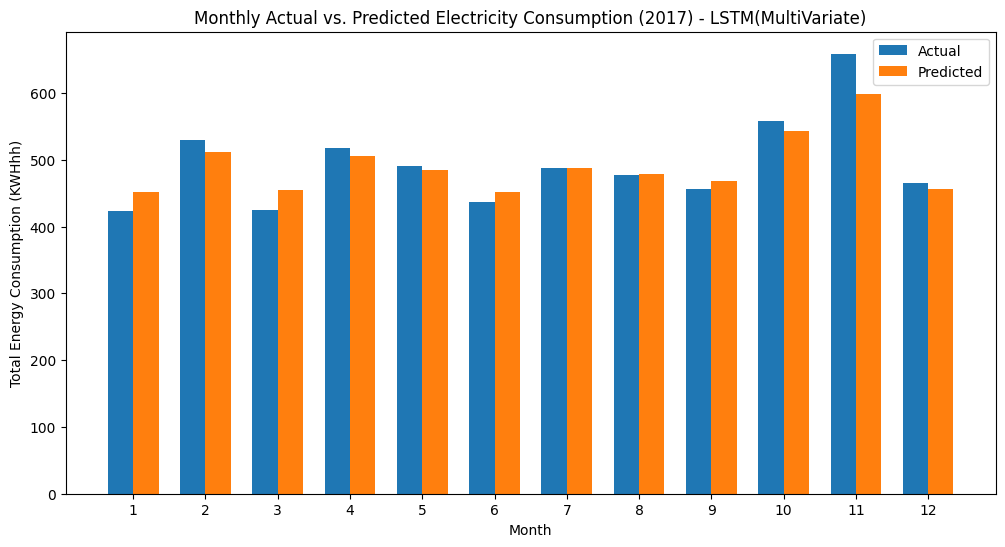

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date_Time' to datetime objects if it's not already
new_df_lstm['Date_Time'] = pd.to_datetime(new_df_lstm['Date_Time'])

# Extract month from 'Date_Time'
new_df_lstm['Month'] = new_df_lstm['Date_Time'].dt.month

# Group by month and calculate the sum of actual and predicted values
monthly_data_lstm = new_df_lstm.groupby('Month').agg({'y_test_original': 'sum', 'y_pred': 'sum'})

# Create the bar graph
plt.figure(figsize=(12, 6))
width = 0.35
x = monthly_data_lstm.index
plt.bar(x - width/2, monthly_data_lstm['y_test_original'], width, label='Actual')
plt.bar(x + width/2, monthly_data_lstm['y_pred'], width, label='Predicted')

plt.xlabel('Month')
plt.ylabel('Total Energy Consumption (KWHhh)')
plt.title('Monthly Actual vs. Predicted Electricity Consumption (2017) - LSTM(MultiVariate)')
plt.xticks(x)
plt.legend()
plt.show()


In [94]:
monthly_data_lstm['Difference'] = abs(monthly_data_lstm['y_test_original'] - monthly_data_lstm['y_pred'])

# Calculate the mean of the absolute differences
mean_absolute_difference_lstm = monthly_data_lstm['Difference'].mean()

print(f"Mean Absolute Difference: {mean_absolute_difference_lstm}")

monthly_data_lstm['Difference Percentage'] = (abs(monthly_data_lstm['y_test_original'] - monthly_data_lstm['y_pred'])/monthly_data_lstm['y_test_original'])*100

# Calculate the mean of the absolute differences
mean_absolute_difference_percentage_lstm = monthly_data_lstm['Difference Percentage'].mean()

print(f"Mean Absolute Difference Percentage: {mean_absolute_difference_percentage_lstm}")

Mean Absolute Difference: 17.740432624885134
Mean Absolute Difference Percentage: 3.5011366885434803


<h2>Random Forrest</h2>

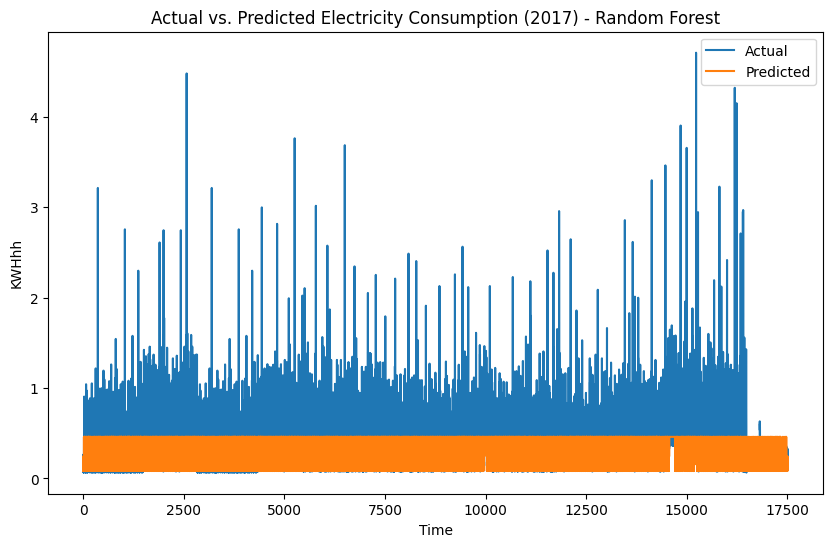

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Prepare the data
train_data = df[(df['Year'] >= 2012) & (df['Year'] <= 2016)]
test_data = df[df['Year'] == 2017]

X_train = train_data[['People', 'Appliances']]
y_train = train_data['KWHhh']
X_test = test_data[['People', 'Appliances']]
y_test = test_data['KWHhh']

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # You can tune hyperparameters
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Further analysis or plotting (optional)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('KWHhh')
plt.title('Actual vs. Predicted Electricity Consumption (2017) - Random Forest')
plt.legend()
plt.show()


Random Forrest Evaluation

In [97]:
# Evaluate the model
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rf_mae = mean_absolute_error(y_test, y_pred)
rf_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
rf_r2= r2_score(y_test, y_pred)
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest MAPE: {rf_mape}")
print(f"Random Forest R-squared: {rf_r2}")


Random Forest RMSE: 0.21634381307045442
Random Forest MAE: 0.09619493730455098
Random Forest MAPE: 22.32551331938263
Random Forest R-squared: 0.39463223759976296


Random Forrest New DataFrame

In [98]:
import pandas as pd
# Create the new DataFrame
new_df_randomforrest = pd.DataFrame({'y_pred': y_pred, 'y_test_original': y_test.values}) # Get values from the y_test Series
# Reset index of test_data to get 'Date_Time' back as a column
#test_data = test_data.reset_index()
new_df_randomforrest['Date_Time'] = test_data['Date_Time'].values

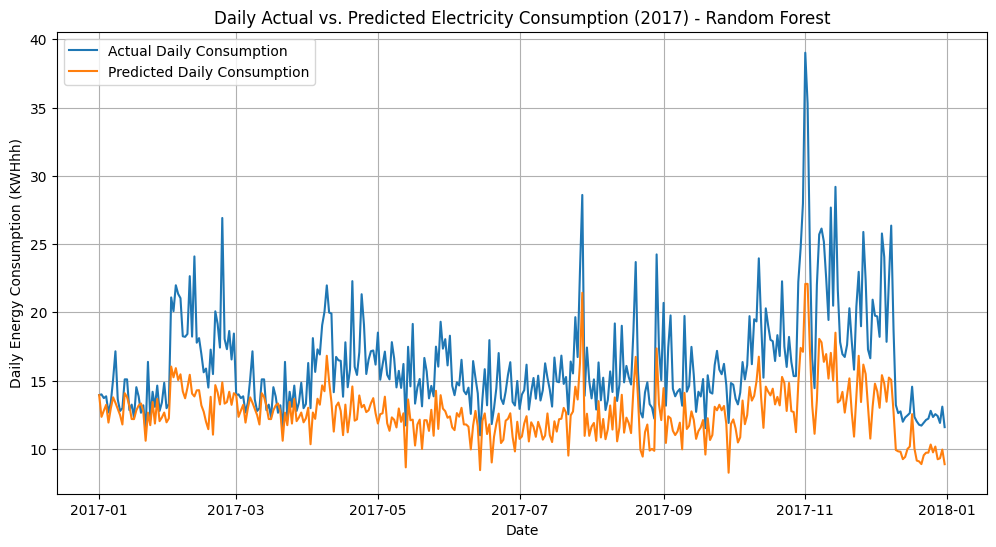

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date_Time' to datetime objects if it's not already
new_df_randomforrest['Date_Time'] = pd.to_datetime(new_df_randomforrest['Date_Time'])

# Aggregate to daily values
daily_randomforrest = new_df_randomforrest.groupby(new_df_randomforrest['Date_Time'].dt.date).agg({'y_pred': 'sum', 'y_test_original': 'sum'})

# Plot the aggregated data
plt.figure(figsize=(12, 6))
plt.plot(daily_randomforrest.index, daily_randomforrest['y_test_original'], label='Actual Daily Consumption')
plt.plot(daily_randomforrest.index, daily_randomforrest['y_pred'], label='Predicted Daily Consumption')
plt.xlabel('Date')
plt.ylabel('Daily Energy Consumption (KWHhh)')
plt.title('Daily Actual vs. Predicted Electricity Consumption (2017) - Random Forest')
plt.legend()
plt.grid(True)
plt.show()


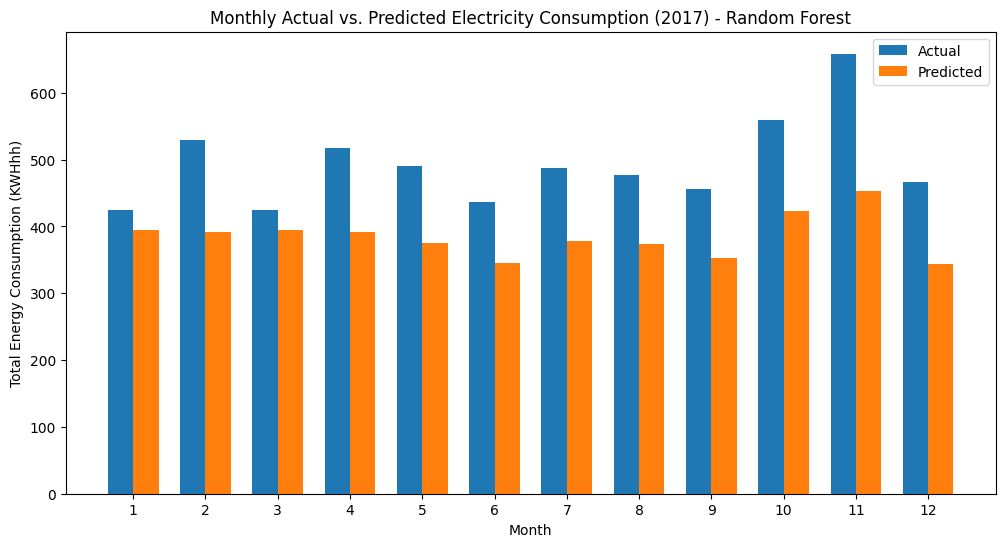

In [100]:

import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date_Time' to datetime objects if it's not already
new_df_randomforrest['Date_Time'] = pd.to_datetime(new_df_randomforrest['Date_Time'])

# Extract month from 'Date_Time'
new_df_randomforrest['Month'] = new_df_randomforrest['Date_Time'].dt.month

# Group by month and calculate the sum of actual and predicted values
monthly_data_randomforest = new_df_randomforrest.groupby('Month').agg({'y_test_original': 'sum', 'y_pred': 'sum'})

# Create the bar graph
plt.figure(figsize=(12, 6))
width = 0.35
x = monthly_data_randomforest.index
plt.bar(x - width/2, monthly_data_randomforest['y_test_original'], width, label='Actual')
plt.bar(x + width/2, monthly_data_randomforest['y_pred'], width, label='Predicted')

plt.xlabel('Month')
plt.ylabel('Total Energy Consumption (KWHhh)')
plt.title('Monthly Actual vs. Predicted Electricity Consumption (2017) - Random Forest')
plt.xticks(x)
plt.legend()
plt.show()


summation(abs(actual value of month - predicted value of month)).mean()


Can we forecast?
 -yes.
 -not always accurately.
 -various models give us various outcomes.
 -arima didn't help us too much.
 -sarimax helped us predict the trend but the values were far off. so did linear regression, xgboost, random forrest.
 -lstm and rnn did better job with values and trend. because they can spot long standing dependencies in the dataset.
 -mae and rmse values can not be reliable when dealing with small valued datapoints.  

came up with:
 -mean monthly absolute difference(aggregation is important). helped us pick the best model.
 -another metric?? standard deviation ??
 -peaks and dips.



In [101]:
monthly_data_randomforest['Difference'] = abs(monthly_data_randomforest['y_test_original'] - monthly_data_randomforest['y_pred'])

# Calculate the mean of the absolute differences
mean_absolute_difference_rf = monthly_data_randomforest['Difference'].mean()

print(f"Mean Absolute Difference: {mean_absolute_difference_rf}")

monthly_data_randomforest['Difference Percentage'] = (abs(monthly_data_randomforest['y_test_original'] - monthly_data_randomforest['y_pred'])/monthly_data_randomforest['y_test_original'])*100

# Calculate the mean of the absolute differences
mean_absolute_difference_percentage_rf = monthly_data_randomforest['Difference Percentage'].mean()

print(f"Mean Absolute Difference Percentage: {mean_absolute_difference_percentage_rf}")

Mean Absolute Difference: 109.32319198981777
Mean Absolute Difference Percentage: 21.48687740818146


<h2>xGBoosting</h2>

XGBoost RMSE: 0.21638418814175264
XGBoost MAE: 0.0962171713882088
XGBoost R-squared: 0.3944062635176875


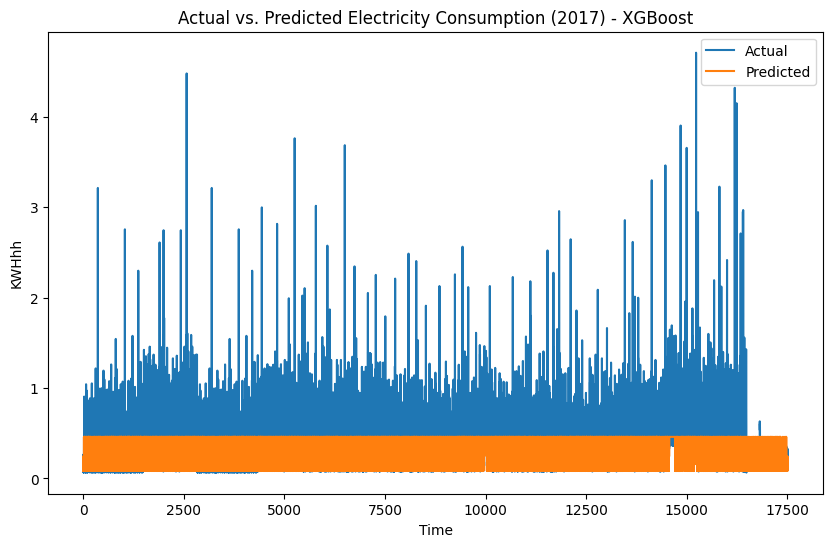

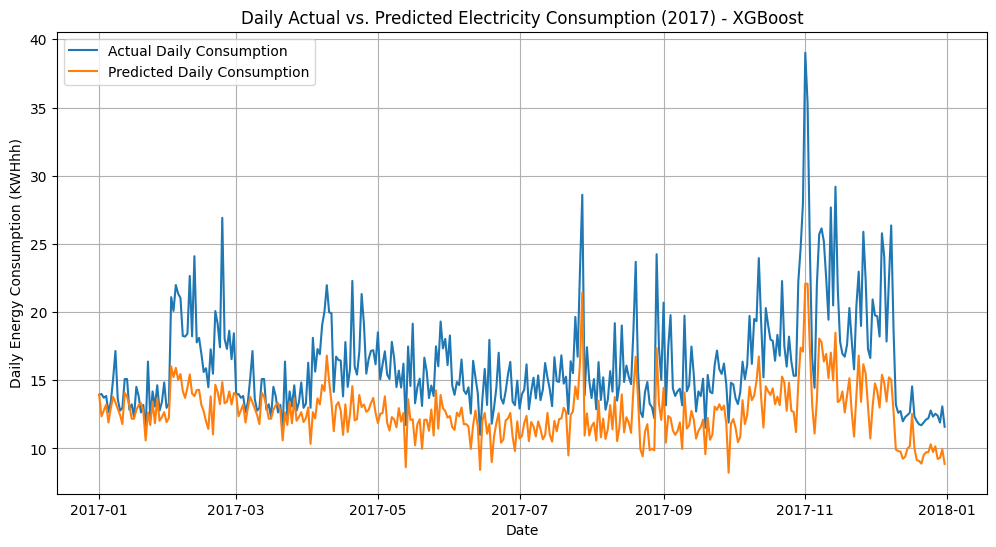

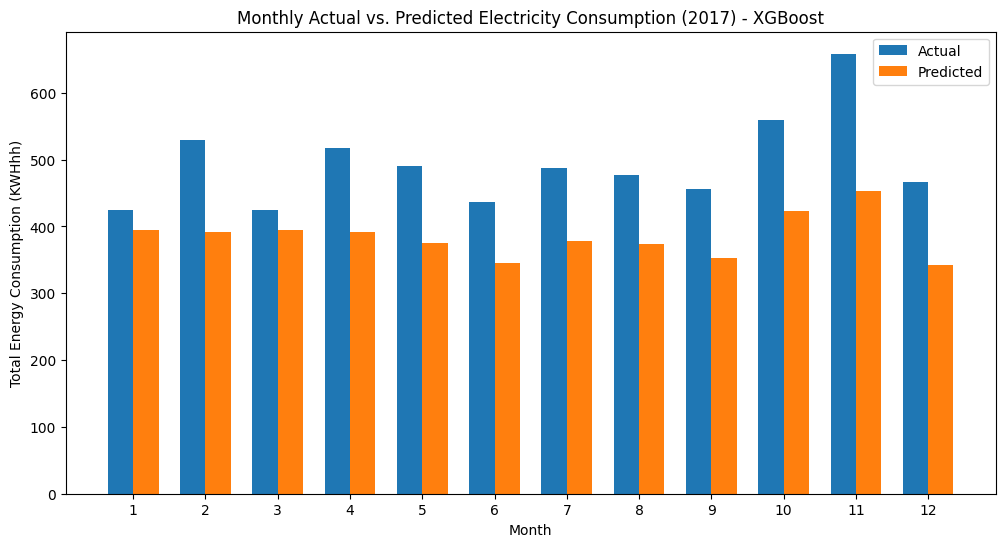

In [105]:
!pip install xgboost

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
import matplotlib.pyplot as plt

# 1. Data Preparation
# Convert 'Date_Time' to datetime objects if it's not already a datetime type
# and it's still a column in your DataFrame:
# if 'Date_Time' in df.columns and not pd.api.types.is_datetime64_dtype(df['Date_Time']):
#     df['Date_Time'] = pd.to_datetime(df['Date_Time'])
# If 'Date_Time' is the index, you can convert it like this:
# if pd.api.types.is_datetime64_dtype(df.index):
#     df.index = pd.to_datetime(df.index)
df = df.set_index('Date_Time')  # Only if 'Date_Time' is a column and not already the index

# Select relevant columns
data = df[['People', 'Appliances', 'KWHhh']]

# Split data into training and testing sets
train_data = df[(df['Year'] >= 2012) & (df['Year'] <= 2016)]
test_data = df[df['Year'] == 2017]

X_train = train_data[['People', 'Appliances']]
y_train = train_data['KWHhh']
X_test = test_data[['People', 'Appliances']]
y_test = test_data['KWHhh']

# 2. Train the XGBoost Model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=70,
    learning_rate=0.1,   # Controls the step size during training
    max_depth=6,         # Determines how deep the trees can grow
    n_estimators=500,    # Number of boosting rounds (trees)
    subsample=0.8,       # Fraction of samples used for training each tree
    colsample_bytree=0.8 # Fraction of features used for training each tree
)

xgb_model.fit(X_train, y_train)

# 3. Make Predictions
y_pred = xgb_model.predict(X_test)

# 4. Evaluate the Model
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
xgb_mae = mean_absolute_error(y_test, y_pred)
xgb_r2 = r2_score(y_test, y_pred)
print(f"XGBoost RMSE: {xgb_rmse}")
print(f"XGBoost MAE: {xgb_mae}")
print(f"XGBoost R-squared: {xgb_r2}")

# 5. Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('KWHhh')
plt.title('Actual vs. Predicted Electricity Consumption (2017) - XGBoost')
plt.legend()
plt.show()

#Create DataFrame for further analysis
new_df_xgboost = pd.DataFrame({'Date_Time': test_data.index, 'y_pred': y_pred, 'y_test_original': y_test})

new_df_xgboost['Date_Time'] = pd.to_datetime(new_df_xgboost['Date_Time'])
# Aggregate to daily values
daily_xgboost = new_df_xgboost.groupby(new_df_xgboost['Date_Time'].dt.date).agg({'y_pred': 'sum', 'y_test_original': 'sum'})

#Plot Daily
plt.figure(figsize=(12, 6))
plt.plot(daily_xgboost.index, daily_xgboost['y_test_original'], label='Actual Daily Consumption')
plt.plot(daily_xgboost.index, daily_xgboost['y_pred'], label='Predicted Daily Consumption')
plt.xlabel('Date')
plt.ylabel('Daily Energy Consumption (KWHhh)')
plt.title('Daily Actual vs. Predicted Electricity Consumption (2017) - XGBoost')
plt.legend()
plt.grid(True)
plt.show()


# Extract month from 'Date_Time'
new_df_xgboost['Month'] = new_df_xgboost['Date_Time'].dt.month

# Group by month and calculate the sum of actual and predicted values
monthly_data_xgboost = new_df_xgboost.groupby('Month').agg({'y_test_original': 'sum', 'y_pred': 'sum'})

#Plot Monthly
plt.figure(figsize=(12, 6))
width = 0.35
x = monthly_data_xgboost.index
plt.bar(x - width/2, monthly_data_xgboost['y_test_original'], width, label='Actual')
plt.bar(x + width/2, monthly_data_xgboost['y_pred'], width, label='Predicted')

plt.xlabel('Month')
plt.ylabel('Total Energy Consumption (KWHhh)')
plt.title('Monthly Actual vs. Predicted Electricity Consumption (2017) - XGBoost')
plt.xticks(x)
plt.legend()
plt.show()

In [106]:
xgb_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"XGBoost MAPE: {xgb_mape}")

XGBoost MAPE: 22.323879121451263


In [107]:
monthly_data_xgboost['Difference'] = abs(monthly_data_xgboost['y_test_original'] - monthly_data_xgboost['y_pred'])

# Calculate the mean of the absolute differences
mean_absolute_difference_xgb = monthly_data_xgboost['Difference'].mean()

print(f"Mean Absolute Difference: {mean_absolute_difference_xgb}")

monthly_data_xgboost['Difference Percentage'] = (abs(monthly_data_xgboost['y_test_original'] - monthly_data_xgboost['y_pred'])/monthly_data_xgboost['y_test_original'])*100

# Calculate the mean of the absolute differences
mean_absolute_difference_percentage_xgb = monthly_data_xgboost['Difference Percentage'].mean()

print(f"Mean Absolute Difference Percentage: {mean_absolute_difference_percentage_xgb}")

Mean Absolute Difference: 109.45064792210415
Mean Absolute Difference Percentage: 21.512560578732334


<h2>Bi-LSTM</h2>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 1. Data Preparation
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df = df.set_index('Date_Time')

# Select relevant columns and scale features
data = df[['People', 'Appliances', 'KWHhh']]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Split data into training and testing sets
train_data = scaled_data[:len(df[(df.index.year >= 2012) & (df.index.year <= 2016)])]
test_data = scaled_data[len(df[(df.index.year >= 2012) & (df.index.year <= 2016)]):]


def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length - 1):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length, -1]  # Predict KWHhh
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)


seq_length = 10  # Adjust sequence length as needed
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# 2. Build the Bi-LSTM Model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# 3. Train the Model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# 4. Make Predictions
y_pred = model.predict(X_test)

# 5. Inverse Transform to Original Scale
y_pred = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), 2)), y_pred), axis=1))[:, -1]
y_test_original = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), 2)), np.expand_dims(y_test, axis=1)), axis=1))[:, -1]

# 6. Evaluate the Model
bilstm_rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
bilstm_mae = mean_absolute_error(y_test_original, y_pred)
bilstm_r2 = r2_score(y_test_original, y_pred)

print(f"Bi-LSTM RMSE: {bilstm_rmse}")
print(f"Bi-LSTM MAE: {bilstm_mae}")
print(f"Bi-LSTM R-squared: {bilstm_r2}")

# 7. Plotting (Example)
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs. Predicted Electricity Consumption (2017) - Bi-LSTM')
plt.show()

# Create DataFrame for further analysis
new_df_bilstm = pd.DataFrame({'Date_Time': df[df.index.year == 2017].index[seq_length+1:], 'y_pred': y_pred, 'y_test_original': y_test_original})


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3287/3287 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - loss: 0.0019
Epoch 2/50
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - loss: 0.0017
Epoch 3/50
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - loss: 0.0017
Epoch 4/50
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - loss: 0.0016
Epoch 5/50
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 42s 9ms/step - loss: 0.0016
Epoch 6/50
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 29s 9ms/step - loss: 0.0016
Epoch 7/50
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 32s 10ms/step - loss: 0.0016
Epoch 8/50
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 29s 9ms/step - loss: 0.0016
Epoch 9/50
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - loss: 0.0015
Epoch 10/50
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - loss: 0.0015
Epoch 11/50
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 29s 9ms/step - loss: 0.0015
Epoch 12/50
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 42s 9ms/step - loss: 0.0016
Epoch 13/50
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 42s 9ms/step - loss: 0.0016
Epoch 14/50
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - loss: 0.0015
Epoch 15/50
3287/3287 

NameError: name 'mean_squared_error' is not defined

Bi-LSTM RMSE: 0.2114306793964643
Bi-LSTM MAE: 0.11778927331671088
Bi-LSTM R-squared: 0.4219625058030516


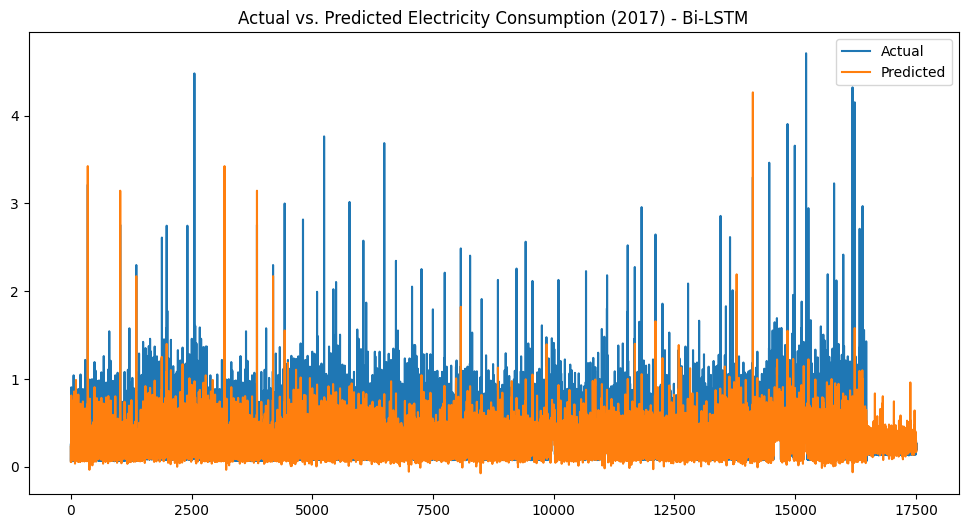

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
# 6. Evaluate the Model
bilstm_rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
bilstm_mae = mean_absolute_error(y_test_original, y_pred)
bilstm_r2 = r2_score(y_test_original, y_pred)

print(f"Bi-LSTM RMSE: {bilstm_rmse}")
print(f"Bi-LSTM MAE: {bilstm_mae}")
print(f"Bi-LSTM R-squared: {bilstm_r2}")

# 7. Plotting (Example)
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs. Predicted Electricity Consumption (2017) - Bi-LSTM')
plt.show()

# Create DataFrame for further analysis
new_df_bilstm = pd.DataFrame({'Date_Time': df[df.index.year == 2017].index[seq_length+1:], 'y_pred': y_pred, 'y_test_original': y_test_original})


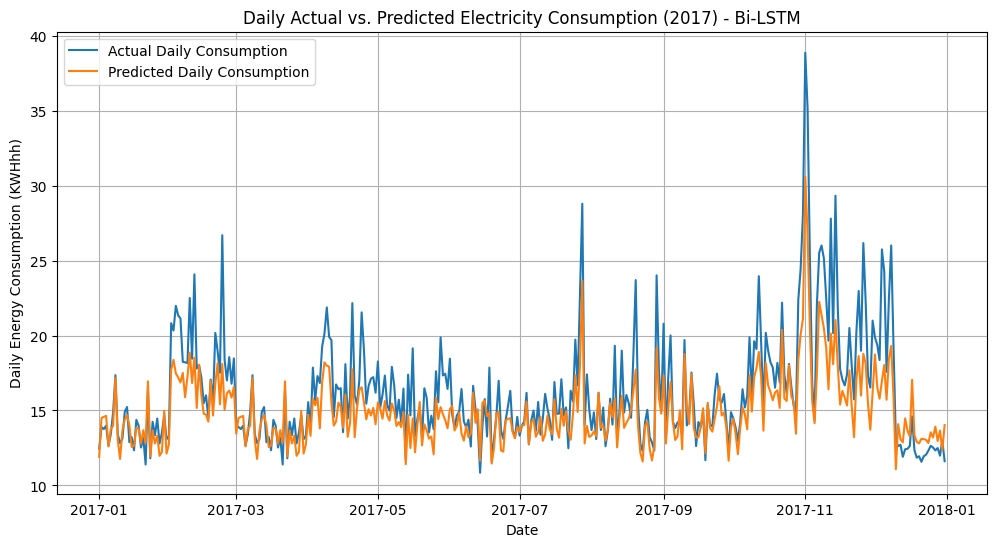

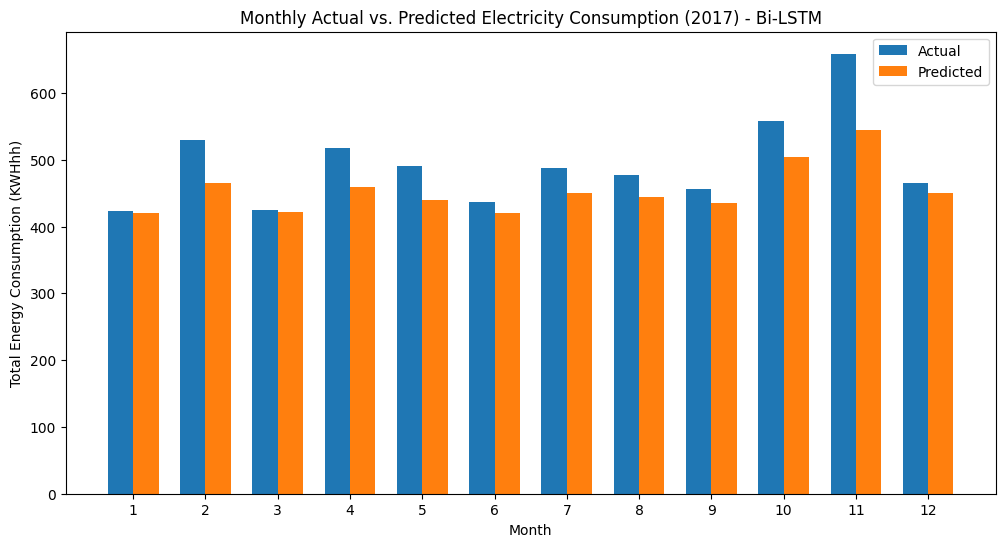

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
# Convert 'Date_Time' to datetime objects if it's not already
new_df_bilstm['Date_Time'] = pd.to_datetime(new_df_bilstm['Date_Time'])

# Aggregate to daily values
daily_bilstm = new_df_bilstm.groupby(new_df_bilstm['Date_Time'].dt.date).agg({'y_pred': 'sum', 'y_test_original': 'sum'})

# Plot the aggregated data
plt.figure(figsize=(12, 6))
plt.plot(daily_bilstm.index, daily_bilstm['y_test_original'], label='Actual Daily Consumption')
plt.plot(daily_bilstm.index, daily_bilstm['y_pred'], label='Predicted Daily Consumption')
plt.xlabel('Date')
plt.ylabel('Daily Energy Consumption (KWHhh)')
plt.title('Daily Actual vs. Predicted Electricity Consumption (2017) - Bi-LSTM')
plt.legend()
plt.grid(True)
plt.show()

# Bi-LSTM monthly plot
# Assuming new_df_bilstm is already created

# Convert 'Date_Time' to datetime objects if it's not already
new_df_bilstm['Date_Time'] = pd.to_datetime(new_df_bilstm['Date_Time'])

# Extract month from 'Date_Time'
new_df_bilstm['Month'] = new_df_bilstm['Date_Time'].dt.month

# Group by month and calculate the sum of actual and predicted values
monthly_data_bilstm = new_df_bilstm.groupby('Month').agg({'y_test_original': 'sum', 'y_pred': 'sum'})

# Create the bar graph
plt.figure(figsize=(12, 6))
width = 0.35
x = monthly_data_bilstm.index
plt.bar(x - width/2, monthly_data_bilstm['y_test_original'], width, label='Actual')
plt.bar(x + width/2, monthly_data_bilstm['y_pred'], width, label='Predicted')

plt.xlabel('Month')
plt.ylabel('Total Energy Consumption (KWHhh)')
plt.title('Monthly Actual vs. Predicted Electricity Consumption (2017) - Bi-LSTM')
plt.xticks(x)
plt.legend()
plt.show()


In [131]:
from sklearn.metrics import mean_absolute_percentage_error

# Calculate MAPE
bilstm_mape = mean_absolute_percentage_error(new_df_bilstm['y_test_original'], new_df_bilstm['y_pred'])*100
print(f"Bi-LSTM MAPE: {bilstm_mape}")


Bi-LSTM MAPE: 38.81919919976708


In [12]:
# Calculate the average of absolute monthly difference for Bi-LSTM
monthly_diff_bilstm = abs(monthly_data_bilstm['y_test_original'] - monthly_data_bilstm['y_pred'])
avg_monthly_diff_bilstm = monthly_diff_bilstm.mean()
print(f"Average absolute monthly difference (Bi-LSTM): {avg_monthly_diff_bilstm}")

monthly_diff_bilstm_percentage = ((monthly_data_bilstm['y_test_original'] - monthly_data_bilstm['y_pred']) / monthly_data_bilstm['y_test_original'])*100
avg_monthly_diff_bilstm_percentage = monthly_diff_bilstm_percentage.mean()
print(f"Average absolute monthly difference percentage (Bi-LSTM): {avg_monthly_diff_bilstm_percentage}")


Average absolute monthly difference (Bi-LSTM): 39.41529034809255
Average absolute monthly difference percentage (Bi-LSTM): 7.411079533307995


<h2>Linear Regression</h2>

Linear Regression RMSE: 0.22229204431063807
Linear Regression MAE: 0.09301656621718384


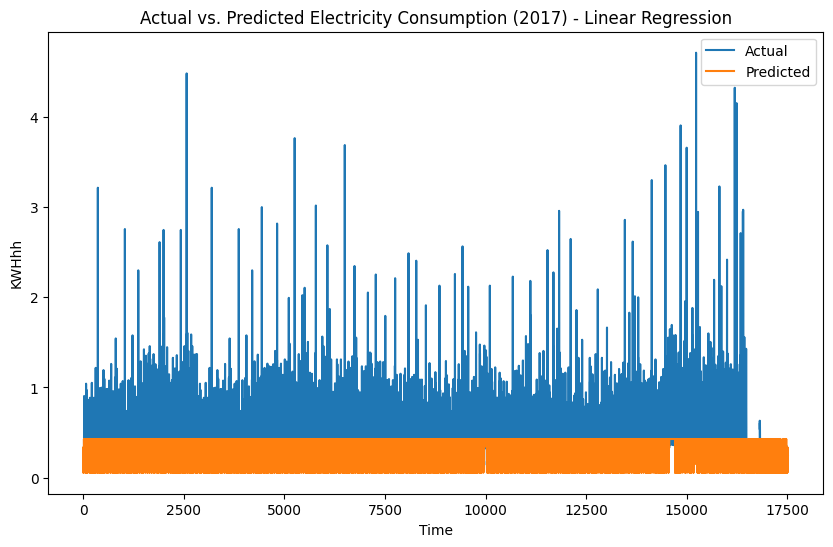

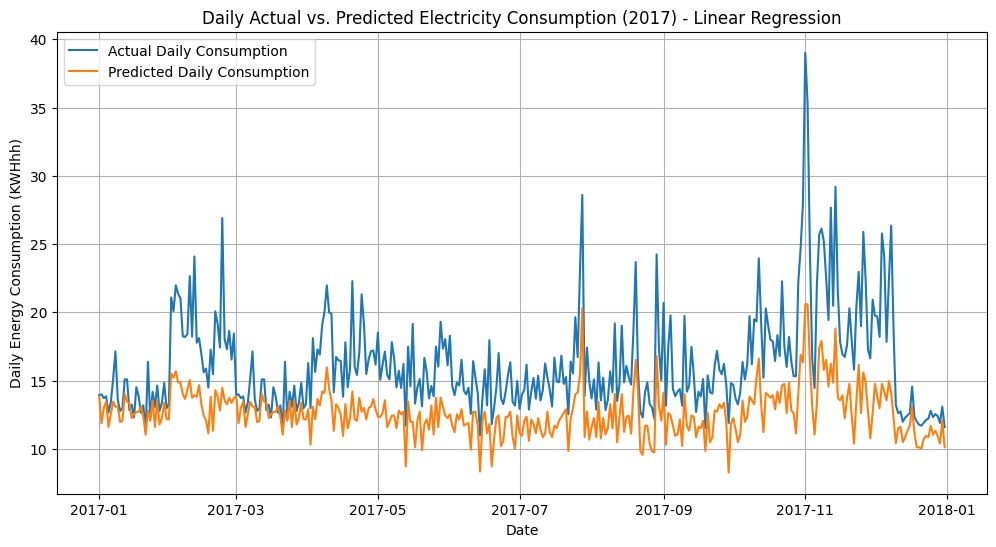

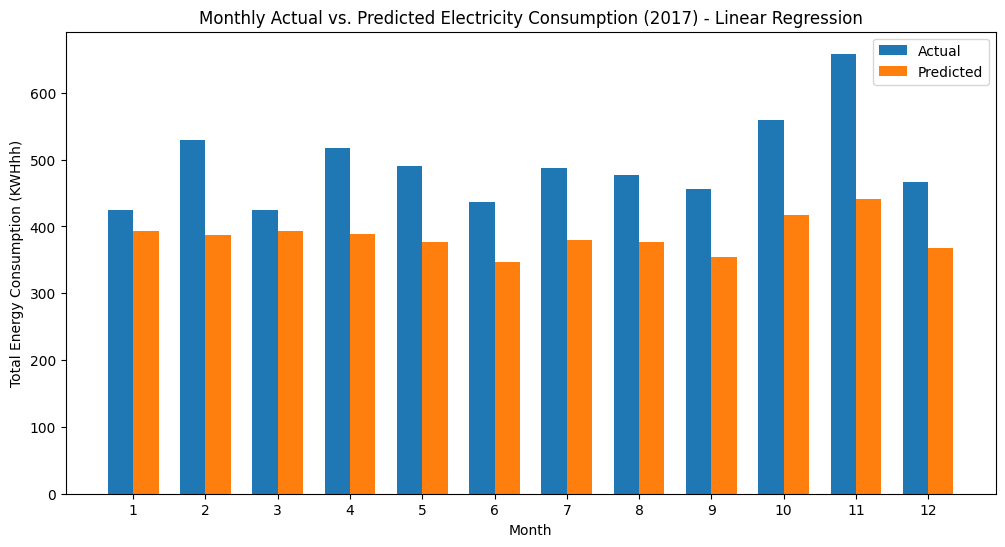

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Prepare the data
train_data = df[(df['Year'] >= 2012) & (df['Year'] <= 2016)]
test_data = df[df['Year'] == 2017]

X_train = train_data[['People', 'Appliances']]
y_train = train_data['KWHhh']
X_test = test_data[['People', 'Appliances']]
y_test = test_data['KWHhh']

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Linear Regression RMSE: {rmse}")
print(f"Linear Regression MAE: {mae}")

# Further analysis or plotting (optional)
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('KWHhh')
plt.title('Actual vs. Predicted Electricity Consumption (2017) - Linear Regression')
plt.legend()
plt.show()

# Create a DataFrame for further analysis
#new_df_linear_regression = pd.DataFrame({'Date_Time': test_data['Date_Time'], 'y_pred': y_pred, 'y_test_original': y_test})
new_df_linear_regression = pd.DataFrame({'Date_Time': test_data.index, 'y_pred': y_pred, 'y_test_original': y_test})
new_df_linear_regression['Date_Time'] = pd.to_datetime(new_df_linear_regression['Date_Time'])

# Aggregate to daily values
daily_linear_regression = new_df_linear_regression.groupby(new_df_linear_regression['Date_Time'].dt.date).agg({'y_pred': 'sum', 'y_test_original': 'sum'})

#Plot Daily
plt.figure(figsize=(12, 6))
plt.plot(daily_linear_regression.index, daily_linear_regression['y_test_original'], label='Actual Daily Consumption')
plt.plot(daily_linear_regression.index, daily_linear_regression['y_pred'], label='Predicted Daily Consumption')
plt.xlabel('Date')
plt.ylabel('Daily Energy Consumption (KWHhh)')
plt.title('Daily Actual vs. Predicted Electricity Consumption (2017) - Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

#Plot Monthly
new_df_linear_regression['Month'] = pd.to_datetime(new_df_linear_regression['Date_Time']).dt.month
monthly_data_linear_regression = new_df_linear_regression.groupby('Month').agg({'y_test_original':'sum', 'y_pred':'sum'})

plt.figure(figsize=(12, 6))
width = 0.35
x = monthly_data_linear_regression.index
plt.bar(x - width/2, monthly_data_linear_regression['y_test_original'], width, label='Actual')
plt.bar(x + width/2, monthly_data_linear_regression['y_pred'], width, label='Predicted')

plt.xlabel('Month')
plt.ylabel('Total Energy Consumption (KWHhh)')
plt.title('Monthly Actual vs. Predicted Electricity Consumption (2017) - Linear Regression')
plt.xticks(x)
plt.legend()
plt.show()


In [109]:
lr_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Linear Regression MAPE: {lr_mape}")

Linear Regression MAPE: 23.4144377162891


In [110]:
monthly_data_linear_regression['Difference'] = abs(monthly_data_linear_regression['y_test_original'] - monthly_data_linear_regression['y_pred'])

# Calculate the mean of the absolute differences
mean_absolute_difference_lr = monthly_data_linear_regression['Difference'].mean()

print(f"Mean Absolute Difference: {mean_absolute_difference_lr}")

monthly_data_linear_regression['Difference Percentage'] = (abs(monthly_data_linear_regression['y_test_original'] - monthly_data_linear_regression['y_pred'])/monthly_data_linear_regression['y_test_original'])*100

# Calculate the mean of the absolute differences
mean_absolute_difference_percentage_lr = monthly_data_linear_regression['Difference Percentage'].mean()

print(f"Mean Absolute Difference Percentage: {mean_absolute_difference_percentage_lr}")

Mean Absolute Difference: 109.00784425904226
Mean Absolute Difference Percentage: 21.324698165933707


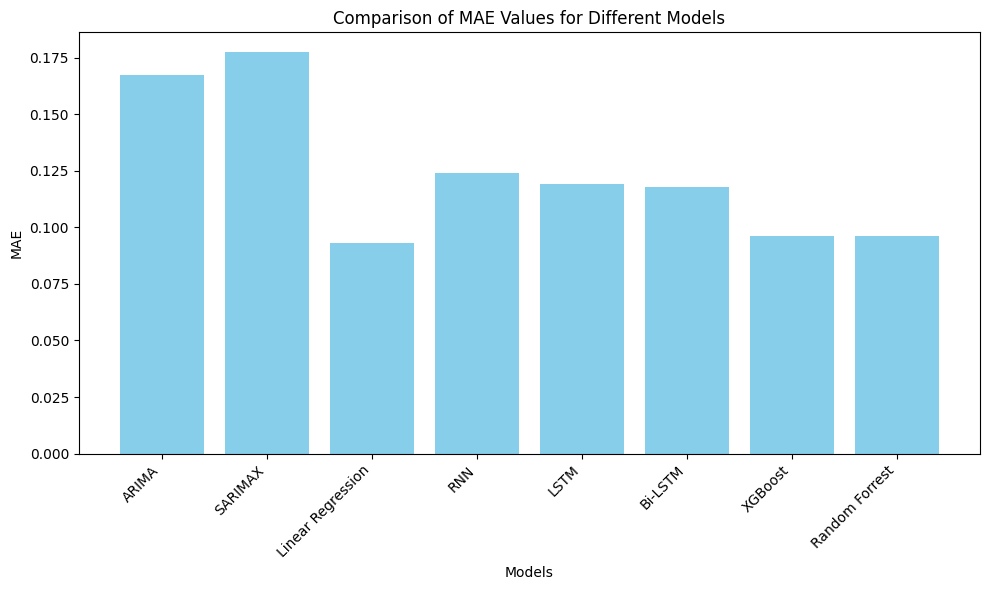

In [146]:
import matplotlib.pyplot as plt

mae_values = {
    'ARIMA': arima_mae,  # Replace with your actual arima_mae value
    'SARIMAX': sarimax_mae/24,  # Replace with your actual sarimax_mae value
    'Linear Regression': mae,  # Replace with your actual mae value
    'RNN': rnn_mae,  # Replace with your actual rnn_mae value
    'LSTM': lstm_mae,
    'Bi-LSTM': bilstm_mae,
    'XGBoost': xgb_mae,
    'Random Forrest': rf_mae,

}

models = list(mae_values.keys())
mae_scores = list(mae_values.values())

plt.figure(figsize=(10, 6))
plt.bar(models, mae_scores, color='skyblue')
plt.xlabel("Models")
plt.ylabel("MAE")
plt.title("Comparison of MAE Values for Different Models")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [116]:
data_created_metrics = {
    "Arima": {
        "Monthly Mean Absolute Difference": 106.0969522669322,
        "Monthly Mean Absolute Difference Percentage": 20.232654965244283
    },
    "Sarimax": {
        "Monthly Mean Absolute Difference": 129.3529825812703,
        "Monthly Mean Absolute Difference Percentage": 25.71358022229076
    },

    "Linear Regression": {
        "Monthly Mean Absolute Difference": 109.00784425904226,
        "Monthly Mean Absolute Difference Percentage": 21.324698165933707
    },
    "Rnn": {
        "Monthly Mean Absolute Difference": 22.285733185221506,
        "Monthly Mean Absolute Difference Percentage": 4.391845691230419
    },
    "Lstm": {
        "Monthly Mean Absolute Difference": 17.740432624885134,
        "Monthly Mean Absolute Difference Percentage": 3.5011366885434803
    },
    "Bilstm": {
        "Monthly Mean Absolute Difference": 39.41529034809255,
        "Monthly Mean Absolute Difference Percentage": 7.411079533307995
    },
    "Random Forrest": {
        "Monthly Mean Absolute Difference": 109.32319198981777,
        "Monthly Mean Absolute Difference Percentage": 21.48687740818146
    },
    "Xgboost": {
        "Monthly Mean Absolute Difference": 109.45064792210415,
        "Monthly Mean Absolute Difference Percentage": 21.512560578732334
    }
}

# Create labeled arrays
import pandas as pd

# Convert dictionary to DataFrame
df_created_metrics = pd.DataFrame(data_created_metrics).T
df_created_metrics.reset_index(inplace=True)
df_created_metrics.rename(columns={"index": "Model"}, inplace=True)

# Display the DataFrame
print(df_created_metrics)

               Model  Monthly Mean Absolute Difference  \
0              Arima                        106.096952   
1            Sarimax                        129.352983   
2  Linear Regression                        109.007844   
3                Rnn                         22.285733   
4               Lstm                         17.740433   
5             Bilstm                         39.415290   
6     Random Forrest                        109.323192   
7            Xgboost                        109.450648   

   Monthly Mean Absolute Difference Percentage  
0                                    20.232655  
1                                    25.713580  
2                                    21.324698  
3                                     4.391846  
4                                     3.501137  
5                                     7.411080  
6                                    21.486877  
7                                    21.512561  


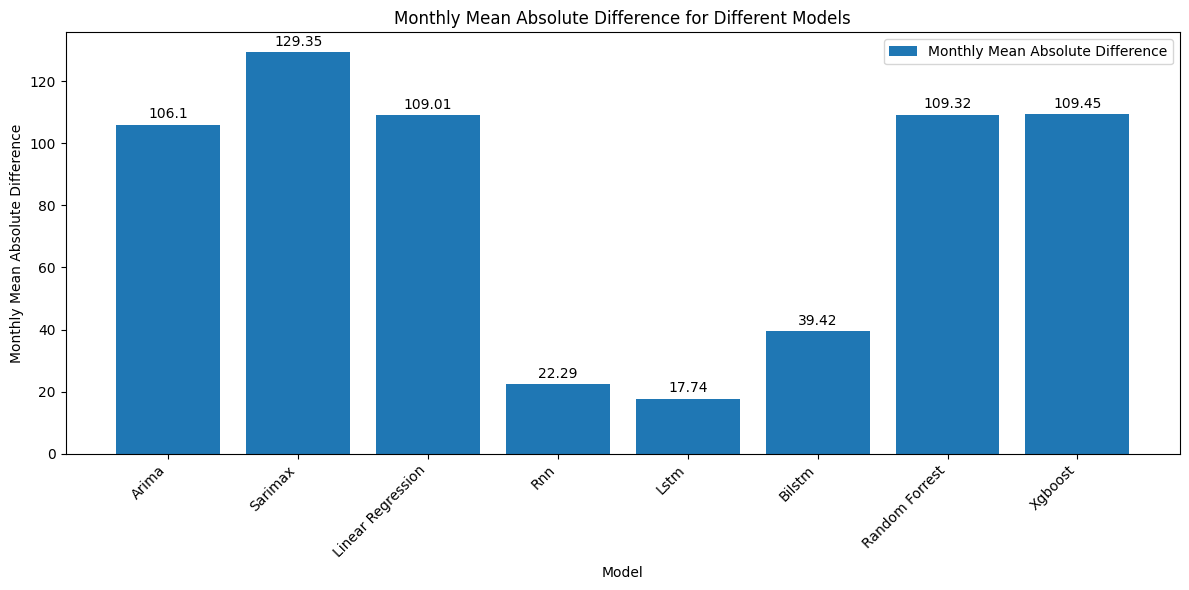

In [140]:
import matplotlib.pyplot as plt

# Create the bar graph
plt.figure(figsize=(12, 6))


x = df_created_metrics['Model']
plt.bar(x, df_created_metrics['Monthly Mean Absolute Difference'], label='Monthly Mean Absolute Difference')

# Add value labels on top of each bar
for i, v in enumerate(df_created_metrics['Monthly Mean Absolute Difference']):
  plt.text(i, v + 2, str(round(v, 2)), ha='center')


plt.xlabel('Model')
plt.ylabel('Monthly Mean Absolute Difference')
plt.title('Monthly Mean Absolute Difference for Different Models')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.legend()
plt.tight_layout()
plt.show()


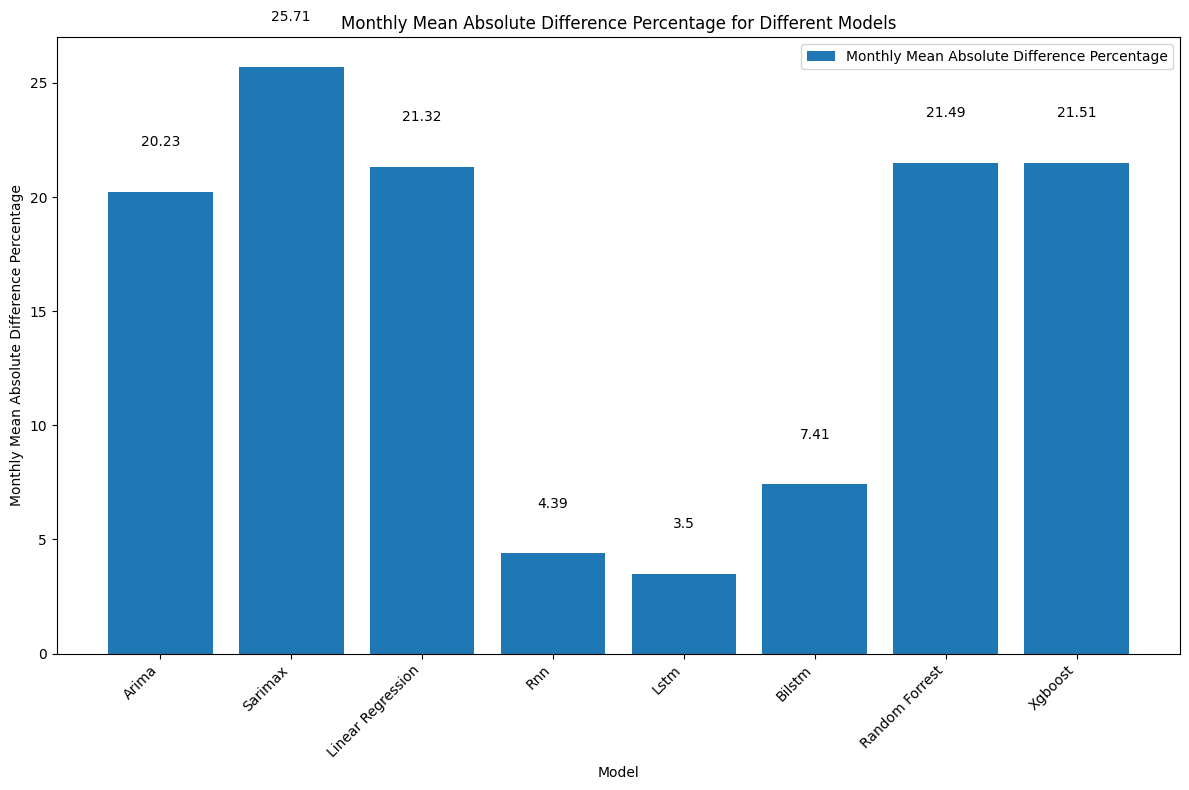

In [139]:
import matplotlib.pyplot as plt

# Create the bar graph
plt.figure(figsize=(12, 8))


x = df_created_metrics['Model']
plt.bar(x, df_created_metrics['Monthly Mean Absolute Difference Percentage'], label='Monthly Mean Absolute Difference Percentage')

# Add value labels on top of each bar
for i, v in enumerate(df_created_metrics['Monthly Mean Absolute Difference Percentage']):
  plt.text(i, v + 2, str(round(v, 2)), ha='center')


plt.xlabel('Model')
plt.ylabel('Monthly Mean Absolute Difference Percentage')
plt.title('Monthly Mean Absolute Difference Percentage for Different Models')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.legend()
plt.tight_layout()
plt.show()


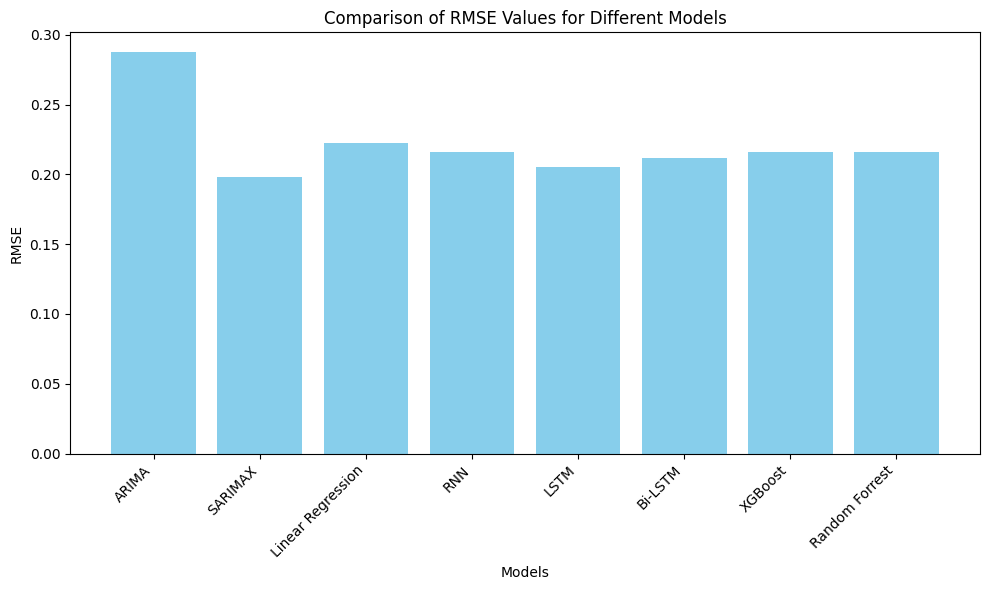

In [144]:
import matplotlib.pyplot as plt

rmse_values = {
    'ARIMA': arima_rmse,
    'SARIMAX': sarimax_rmse/24,
    'Linear Regression': rmse,
    'RNN': rnn_rmse,
    'LSTM': lstm_rmse,
    'Bi-LSTM': bilstm_rmse,
    'XGBoost': xgb_rmse,
    'Random Forrest': rf_rmse
}

models = list(rmse_values.keys())
rmse_scores = list(rmse_values.values())

plt.figure(figsize=(10, 6))
plt.bar(models, rmse_scores, color='skyblue')
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.title("Comparison of RMSE Values for Different Models")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

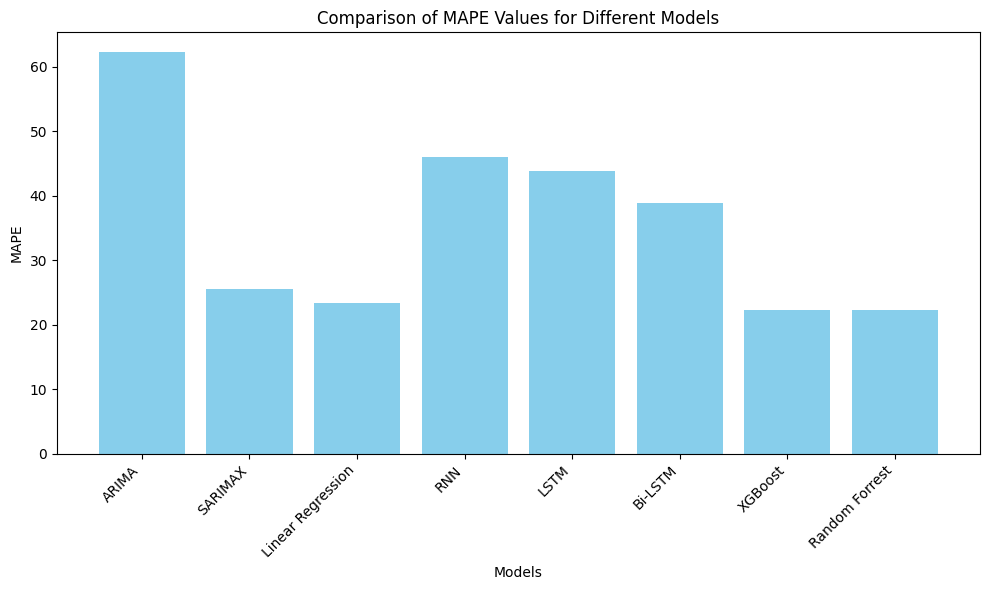

In [141]:

import matplotlib.pyplot as plt

mape_values = {
    'ARIMA': arima_mape,
    'SARIMAX': sarimax_mape,
    'Linear Regression': lr_mape,
    'RNN': rnn_mape,
    'LSTM': lstm_mape,
    'Bi-LSTM': bilstm_mape,
    'XGBoost': xgb_mape,
    'Random Forrest': rf_mape
}

models = list(mape_values.keys())
mape_scores = list(mape_values.values())

plt.figure(figsize=(10, 6))
plt.bar(models, mape_scores, color='skyblue')
plt.xlabel("Models")
plt.ylabel("MAPE")
plt.title("Comparison of MAPE Values for Different Models")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [148]:
import pandas as pd
mae_df = pd.DataFrame({'Model': list(mae_values.keys()), 'MAE': list(mae_values.values())})
mae_df


,Model,MAE
0,ARIMA,0.167604
1,SARIMAX,0.177378
2,Linear Regression,0.093017
3,RNN,0.123895
4,LSTM,0.118974
5,Bi-LSTM,0.117789
6,XGBoost,0.096217
7,Random Forrest,0.096195


In [150]:
import pandas as pd

rmse_values = {
    'ARIMA': arima_rmse,
    'SARIMAX': sarimax_rmse/24,
    'Linear Regression': rmse,
    'RNN': rnn_rmse,
    'LSTM': lstm_rmse,
    'Bi-LSTM': bilstm_rmse,
    'XGBoost': xgb_rmse,
    'Random Forrest': rf_rmse
}

rmse_df = pd.DataFrame({'Model': list(rmse_values.keys()), 'RMSE': list(rmse_values.values())})
rmse_df


,Model,RMSE
0,ARIMA,0.287392
1,SARIMAX,0.198007
2,Linear Regression,0.222292
3,RNN,0.216202
4,LSTM,0.205098
5,Bi-LSTM,0.211431
6,XGBoost,0.216384
7,Random Forrest,0.216344


In [151]:
import pandas as pd
mape_df = pd.DataFrame({'Model': list(mape_values.keys()), 'MAPE': list(mape_values.values())})
mape_df


,Model,MAPE
0,ARIMA,62.253005
1,SARIMAX,25.518206
2,Linear Regression,23.414438
3,RNN,46.000702
4,LSTM,43.843888
5,Bi-LSTM,38.819199
6,XGBoost,22.323879
7,Random Forrest,22.325513
